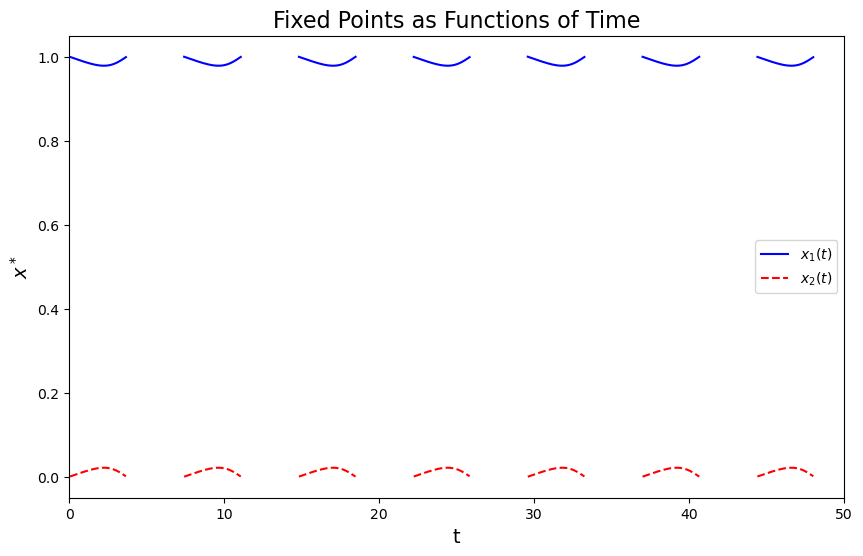

In [1]:
# Values of fixed points and its behaviour

import numpy as np
import matplotlib.pyplot as plt


# Parameters
beta = 0.2                                # Damping coefficient
G = 0.32                                  # Parametric forcing strength
omega = 0.85                              # Driving frequency
F = 0.02                                  # Forcing amplitude
t_max = 50                                # Total time 
t_steps = 1000                            # Number of time steps
t_values = np.linspace(0, t_max, t_steps) 



# To compute fixed points

def compute_x(t):
    A = 1
    B = -1
    C = F * np.sin(omega * t) / (1 + G * np.cos(omega * t))
    D = B**2 - 4 * A * C
    
    if D >= 0:
        x1 = (-B + np.sqrt(D)) / (2 * A)
        x2 = (-B - np.sqrt(D)) / (2 * A)
        if x1<1 and x2 >-1:
            return x1, x2
        else:
            return np.nan, np.nan
    else:
        return np.nan, np.nan  



x1_values = []
x2_values = []

for t in t_values:
    x1, x2 = compute_x(t)
    x1_values.append(x1)
    x2_values.append(x2)


plt.figure(figsize=(10, 6))
plt.plot(t_values, x1_values, label=r'$x_1(t)$', color='blue')
plt.plot(t_values, x2_values, label=r'$x_2(t)$', color='red', linestyle='--')
plt.xlabel('t', fontsize=14)
plt.ylabel(r'$x^*$', fontsize=14)
plt.xlim(0,t_max)
plt.title('Fixed Points as Functions of Time', fontsize=16)
plt.legend()
plt.show()


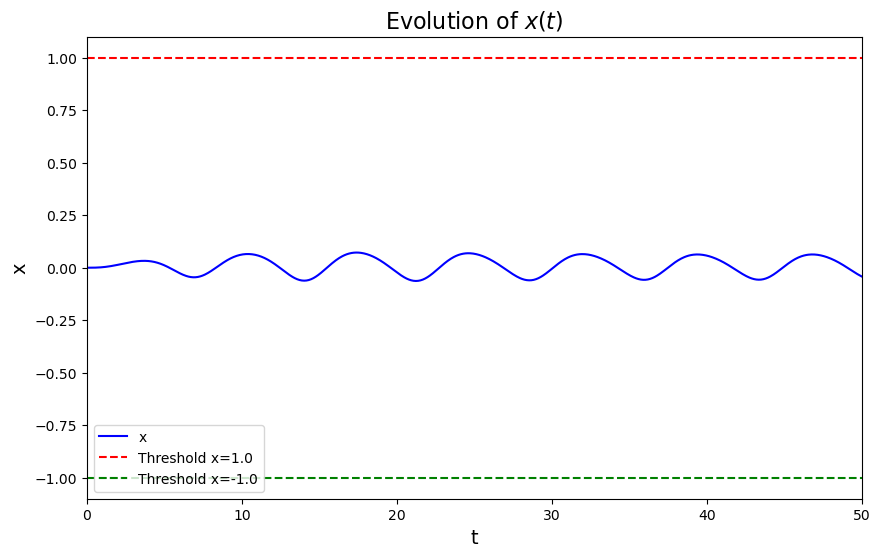

In [8]:
# x-t evolution of function

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp



# Parameters
beta = 0.2        
G = 0.32           
omega = 0.85                 
F = 0.02      
t_max = 50
initial_conditions = [0, 0]  
stop_threshold_upper = 1.0   # roll threshold
stop_threshold_lower = -1.0 




# 2-D linear equivalent

def system(t, y):
    x, v = y
    dxdt = v
    dvdt = F * np.sin(omega * t) - beta * v - x * (1 - x) * (1 + G * np.cos(omega * t))
    return [dxdt, dvdt]


t_eval = np.linspace(0, t_max, 1000)
sol = solve_ivp(system, [0, t_max], initial_conditions, method='RK45', t_eval=t_eval)
t_values_evolved = sol.t
x_values = sol.y[0]



threshold_reached = False

for i in range(1, len(t_values_evolved)):
    if not threshold_reached and x_values[i] >= stop_threshold_upper:
        print(f"x(t) reached {stop_threshold_upper} at t = {t_values_evolved[i]:.4f}")
        threshold_reached = True
        t_values_evolved = t_values_evolved[:i+1]
        x_values = x_values[:i+1]

    
    if not threshold_reached and x_values[i] <= stop_threshold_lower:
        print(f"x(t) reached {stop_threshold_lower} at t = {t_values_evolved[i]:.4f}")
        threshold_reached = True
        t_values_evolved = t_values_evolved[:i+1]
        x_values = x_values[:i+1]
        break




plt.figure(figsize=(10, 6))
plt.plot(t_values_evolved, x_values, label="x", color='b')
plt.axhline(y=stop_threshold_upper, color='r', linestyle='--', label=f'Threshold x={stop_threshold_upper}')
plt.axhline(y=stop_threshold_lower, color='g', linestyle='--', label=f'Threshold x={stop_threshold_lower}')
plt.xlabel('t', fontsize=14)
plt.ylabel('x', fontsize=14)
plt.xlim(0,t_max)
plt.title('Evolution of $x(t)$', fontsize=16)
plt.savefig('fig.png', dpi=600)
plt.legend(loc='lower left')
plt.show()

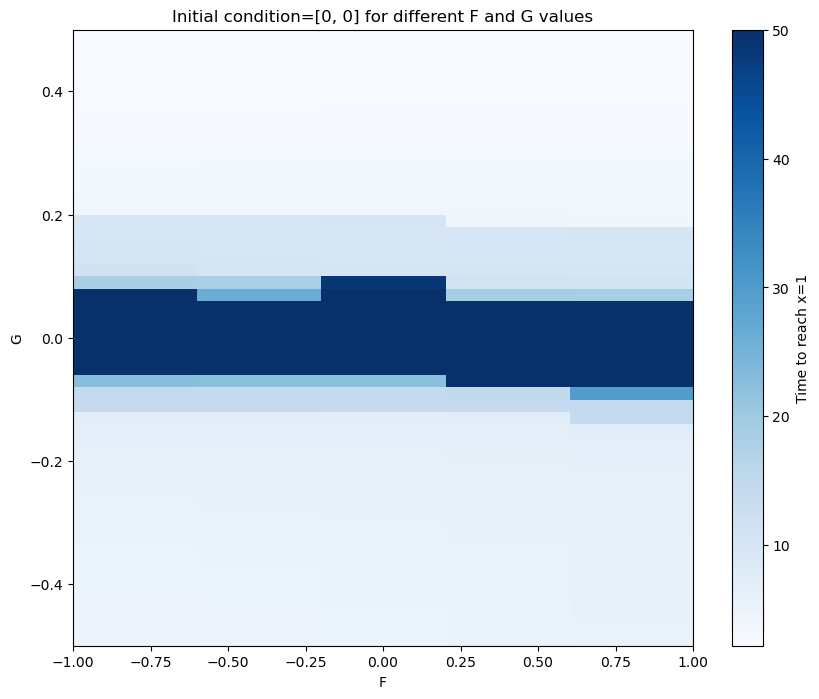

In [3]:
# Colormap for some initial condition and range of F and G values

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
beta = 0.2
omega = 0.85  
t_max = 50   
initial_conditions = [0, 0]  

t_values = np.linspace(0, t_max, 1000)
F_values = np.linspace(-1, 1, 50)  
G_values = np.linspace(-0.5, 0.5, 5)


def system(t, y, F, G):
    x, v = y
    dxdt = v
    dvdt = -beta*v - x*(1-x)*(1 + G*np.cos(omega*t)) + F*np.sin(omega*t)
    return [dxdt, dvdt]



time_stop = np.zeros((len(F_values), len(G_values)))

for i, F in enumerate(F_values):
    for j, G in enumerate(G_values):
        sol = solve_ivp(system, [0, t_max], initial_conditions, t_eval=t_values, method='RK45', args=(F,G))
        
        x_values = sol.y[0]  
        time_stop_val = t_max
        for k, x in enumerate(x_values):
            if x >= 1:
                time_stop_val = sol.t[k]
                break
        time_stop[i, j] = time_stop_val




plt.figure(figsize=(10, 8))
plt.imshow(time_stop, aspect='auto', extent=[F_values[0], F_values[-1], G_values[0], G_values[-1]], origin='lower', cmap='Blues', interpolation='nearest')
plt.colorbar(label="Time to reach x=1")
plt.xlabel("F")
plt.ylabel("G")
plt.title(f"Initial condition={initial_conditions} for different F and G values")
plt.savefig('fig2.png', dpi=600)
plt.show()

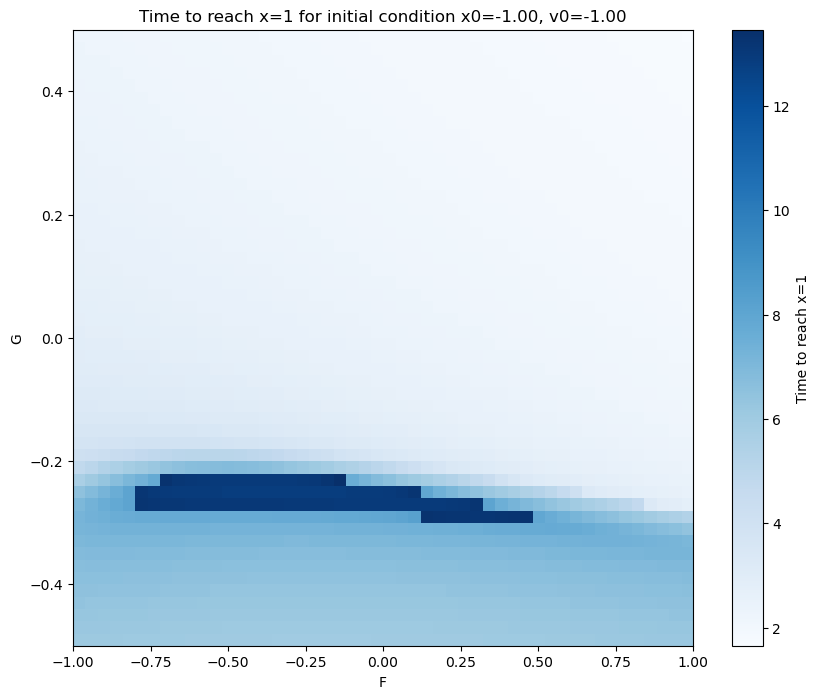

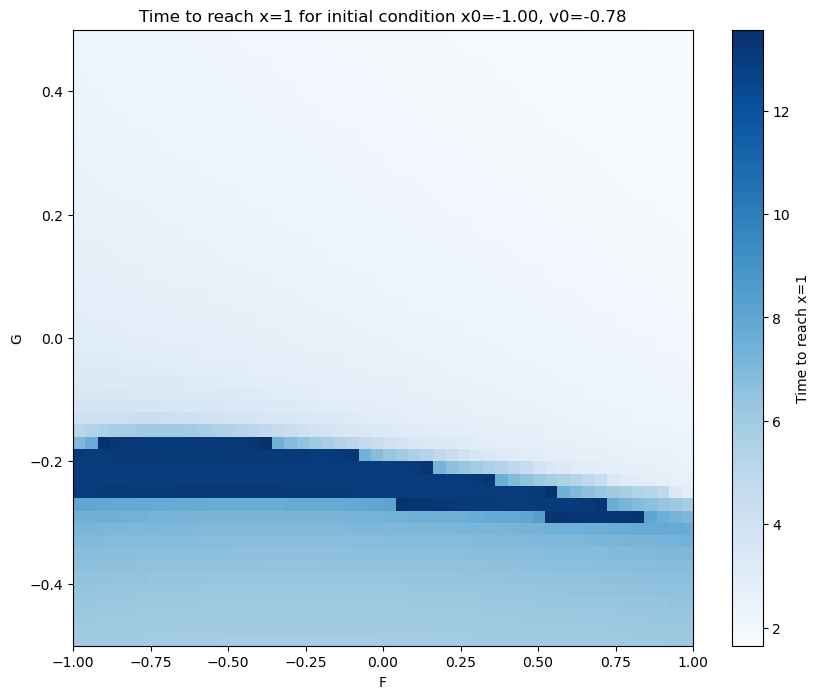

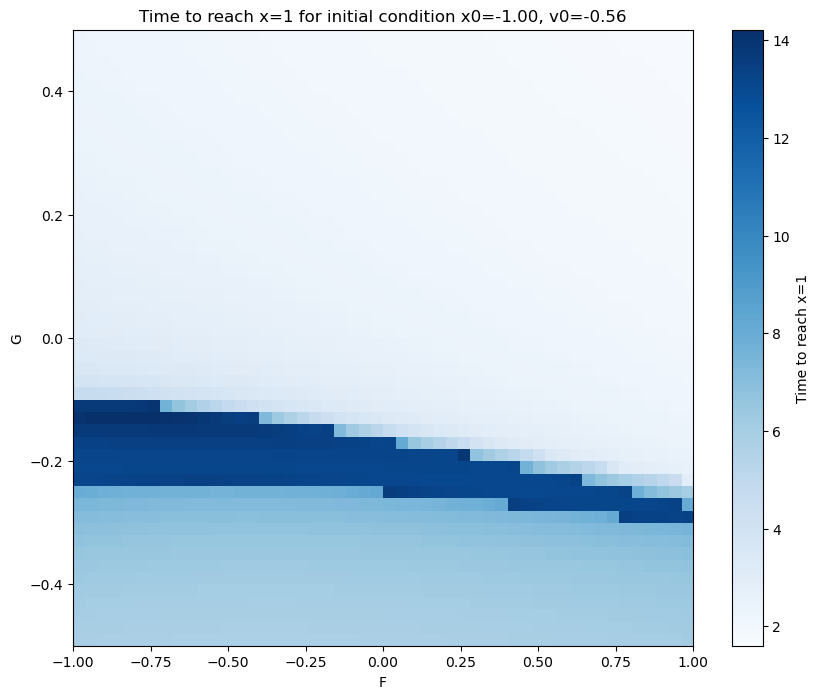

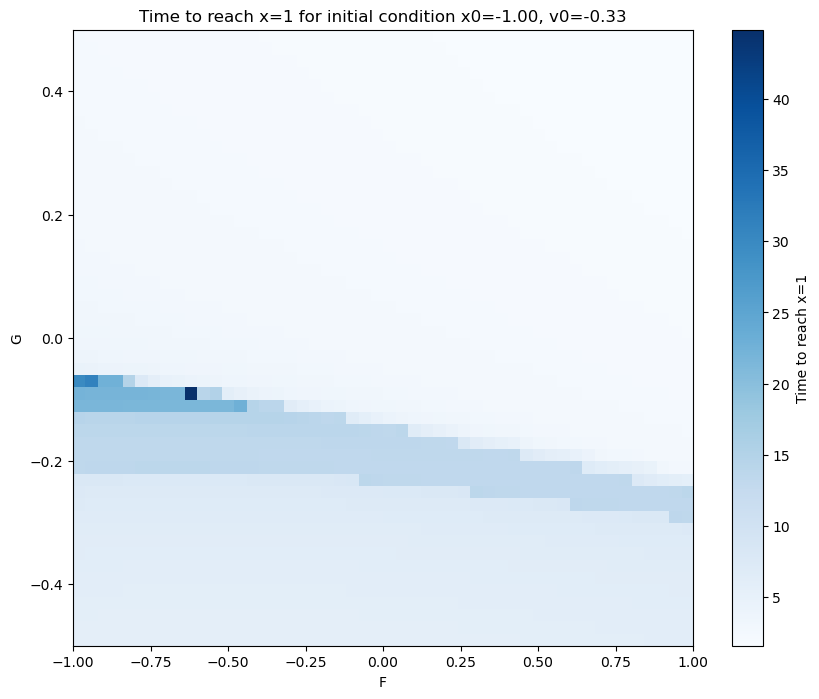

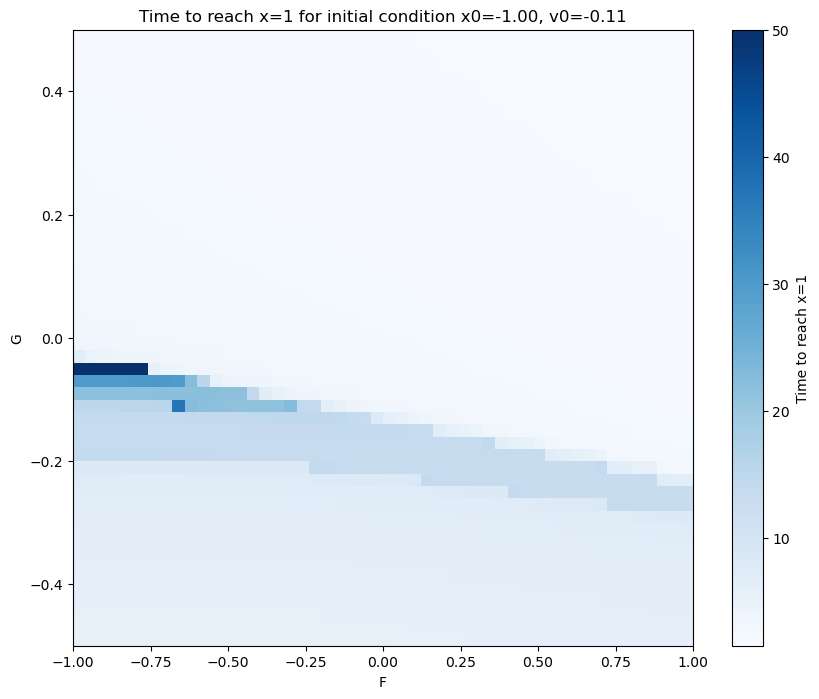

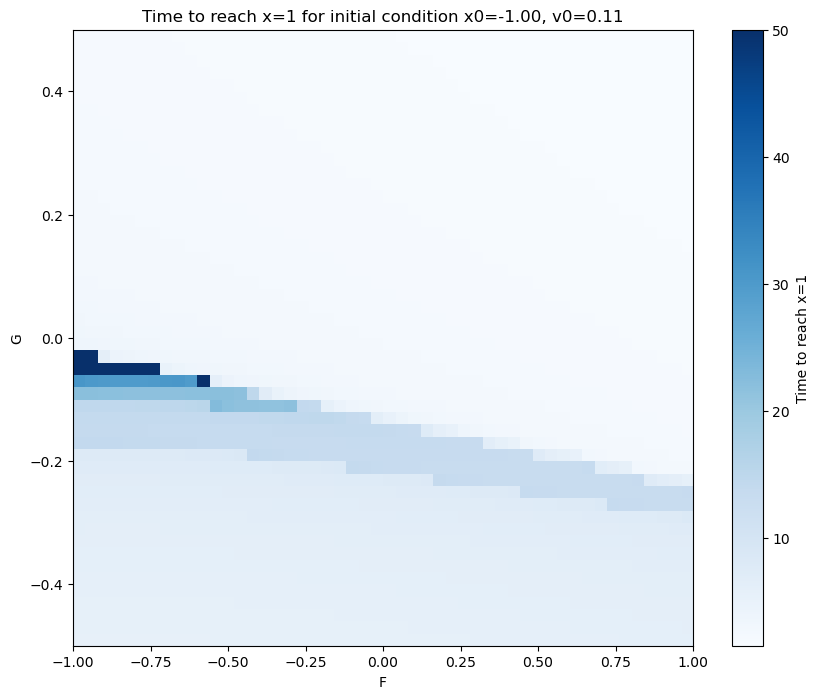

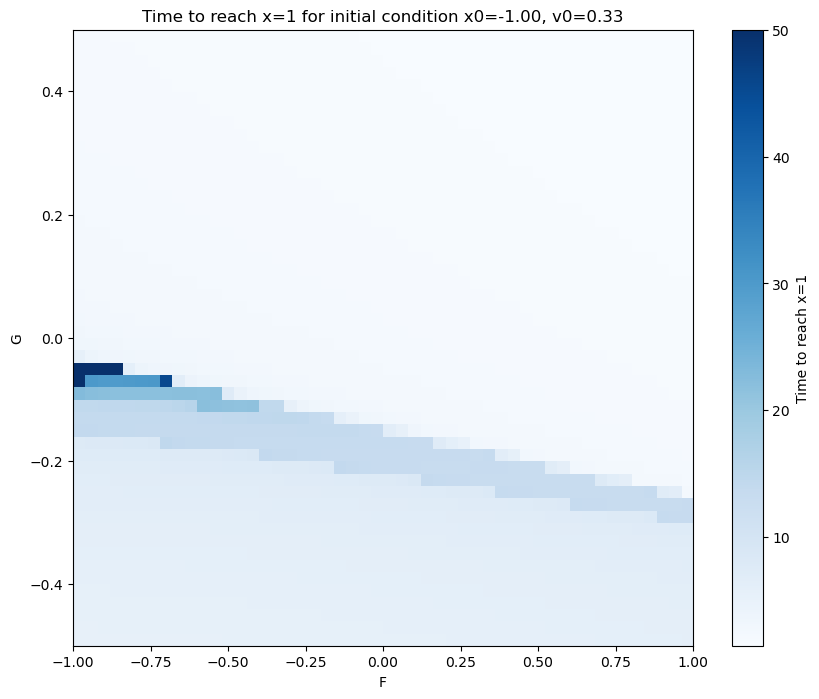

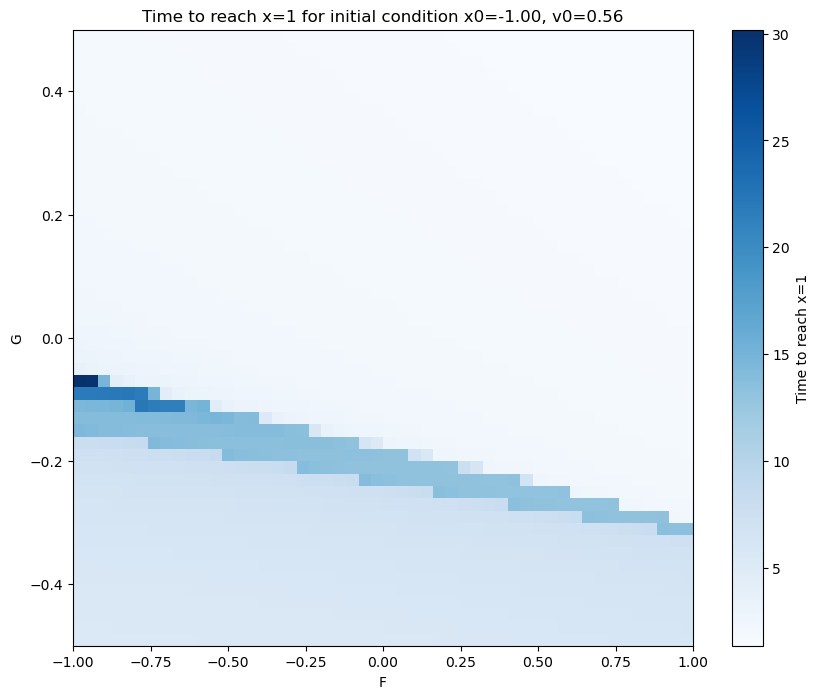

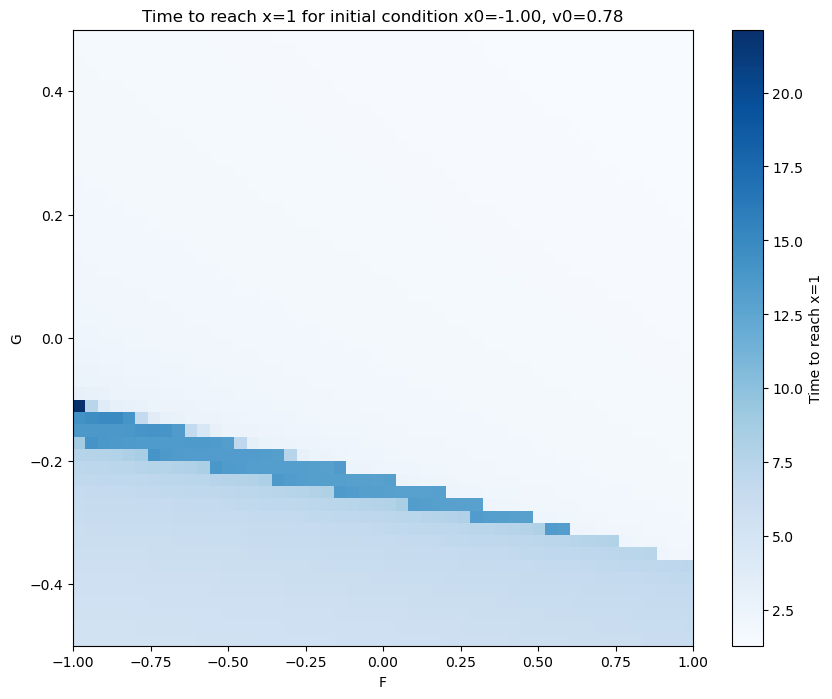

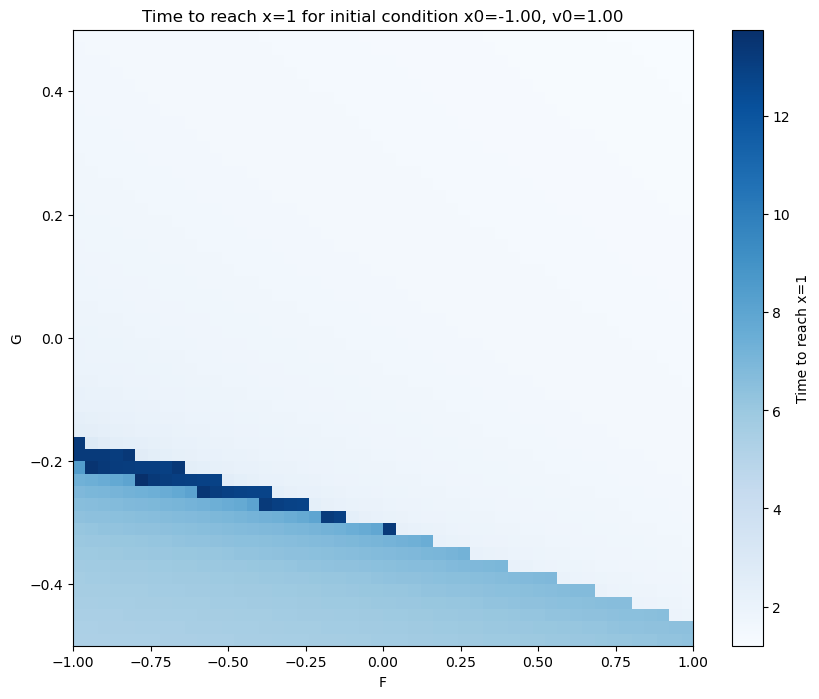

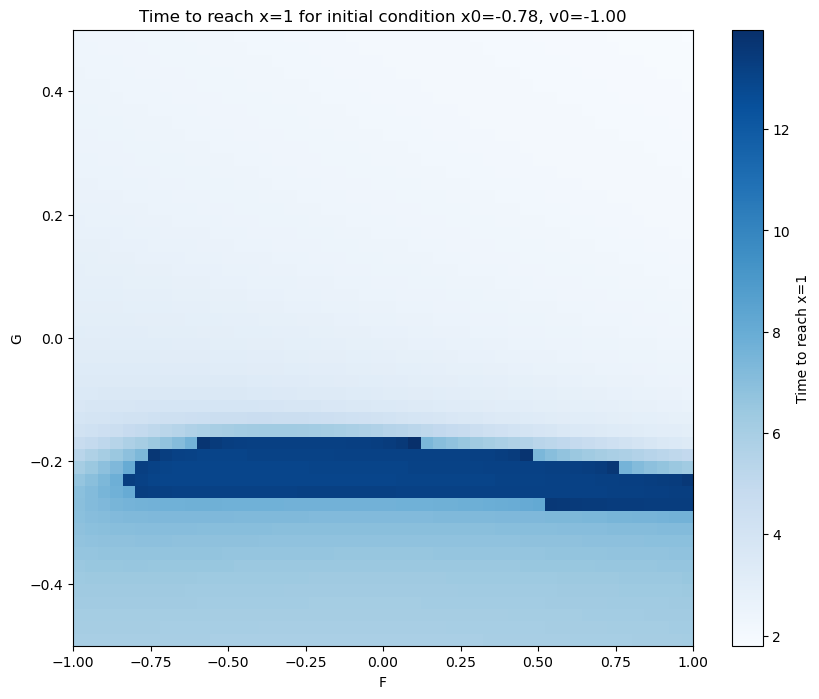

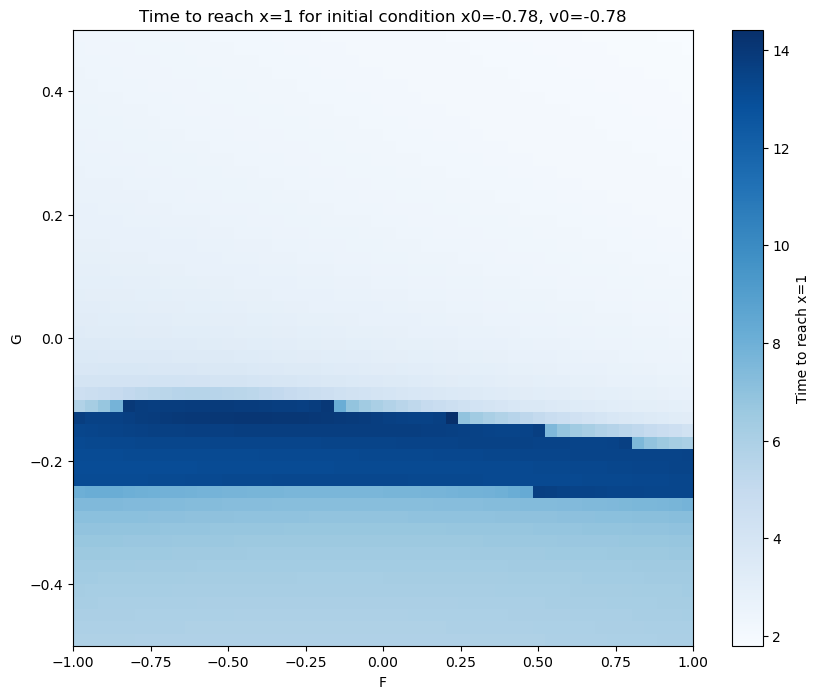

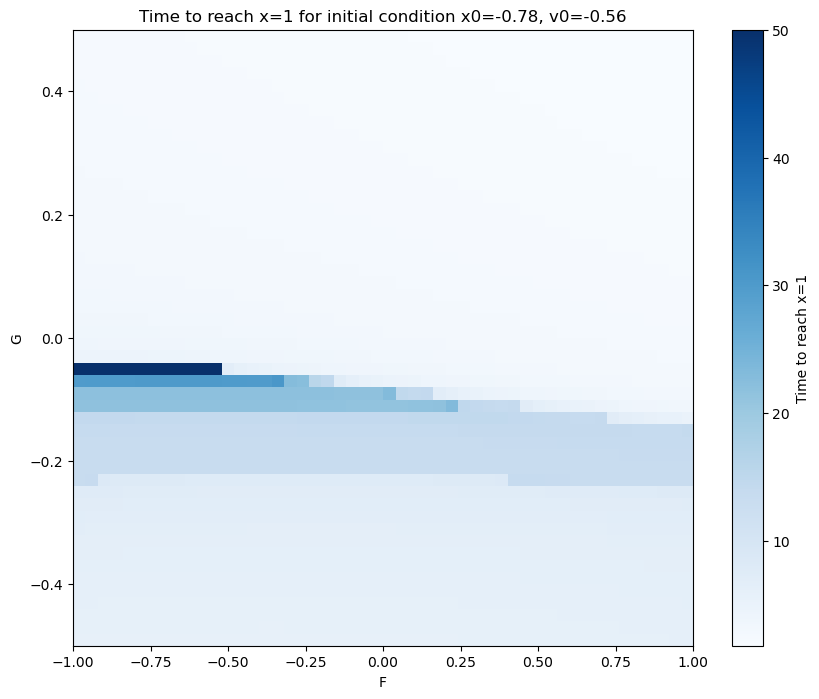

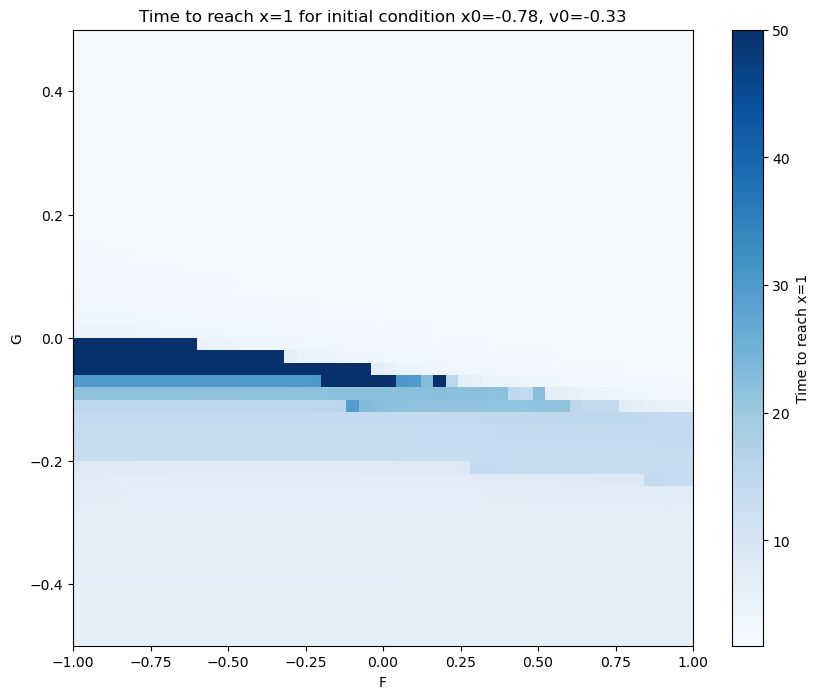

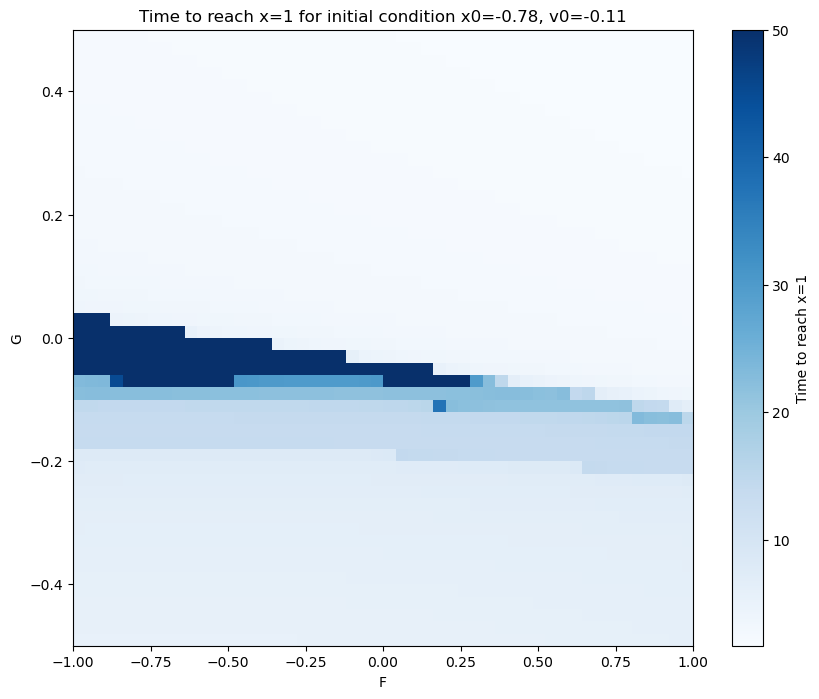

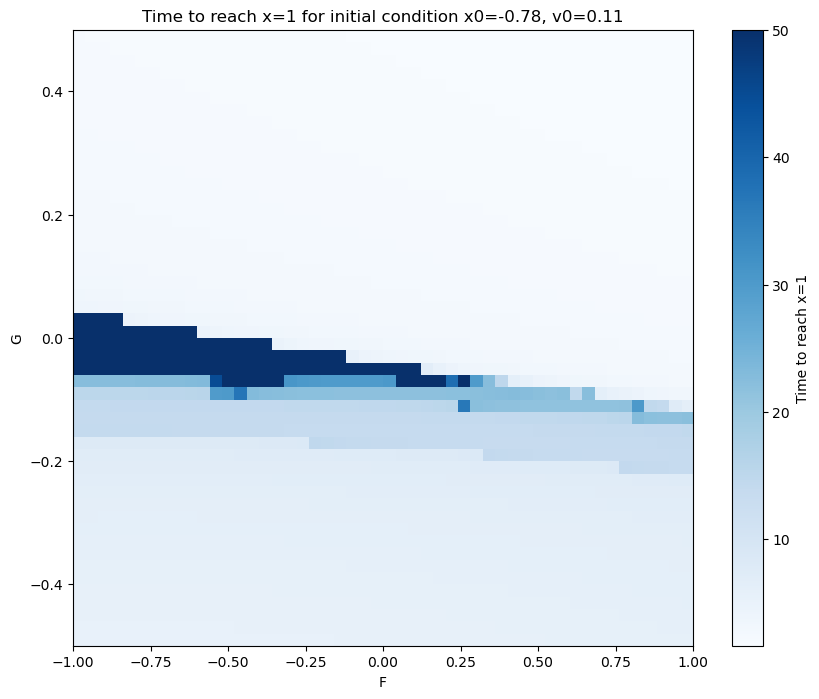

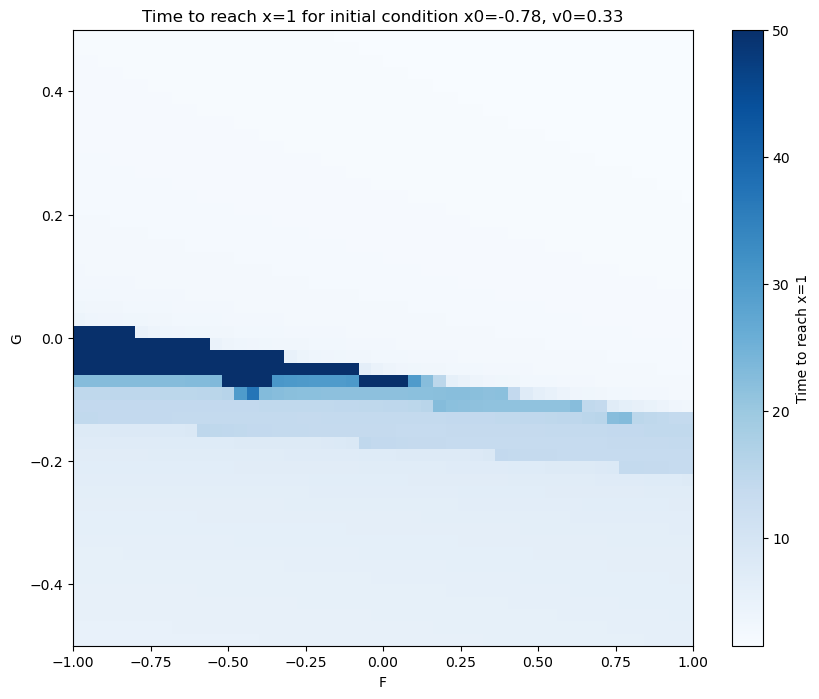

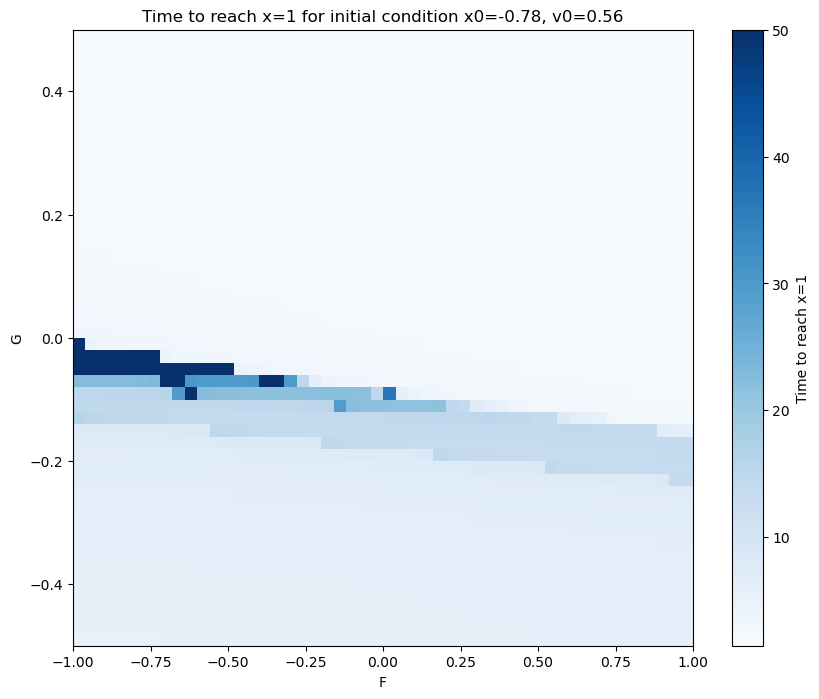

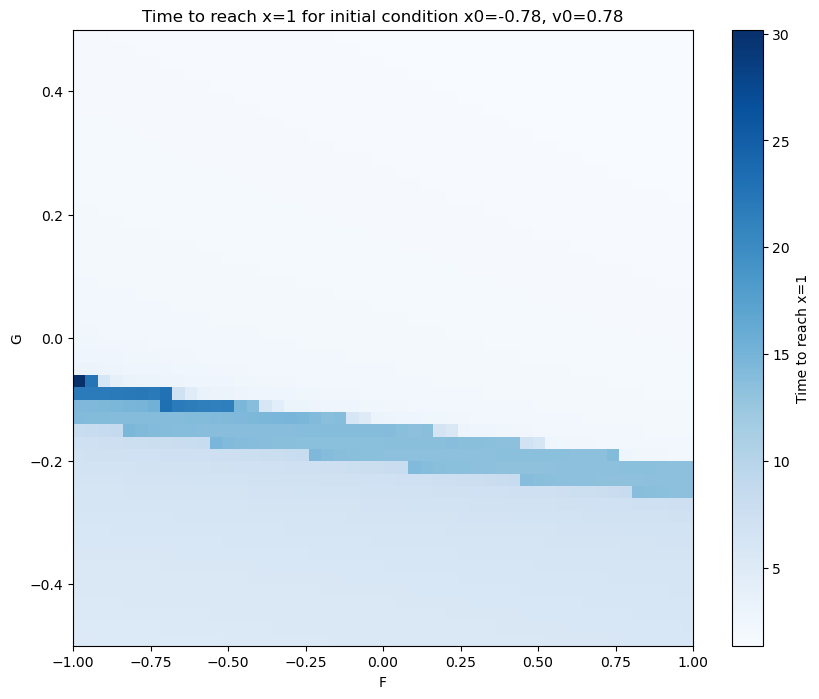

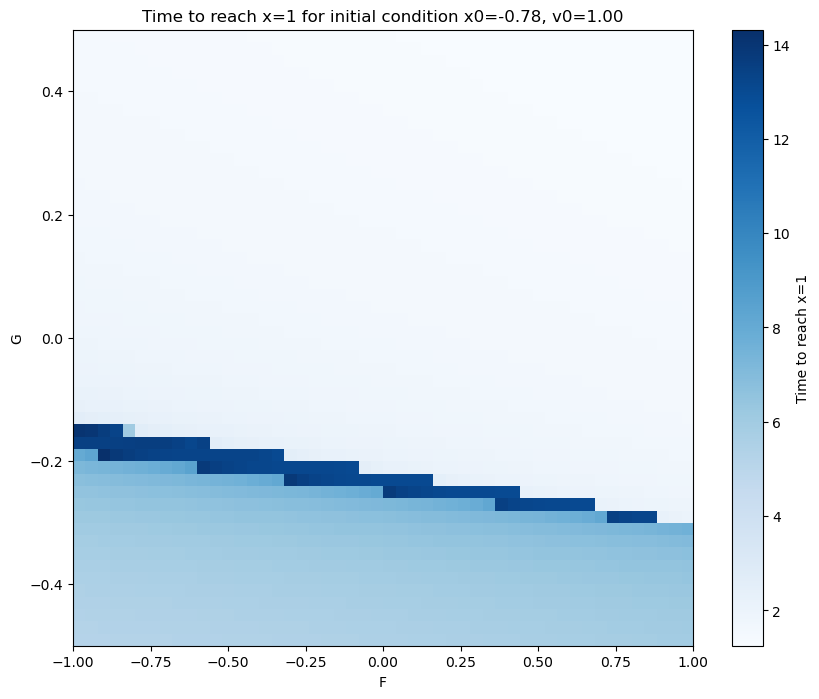

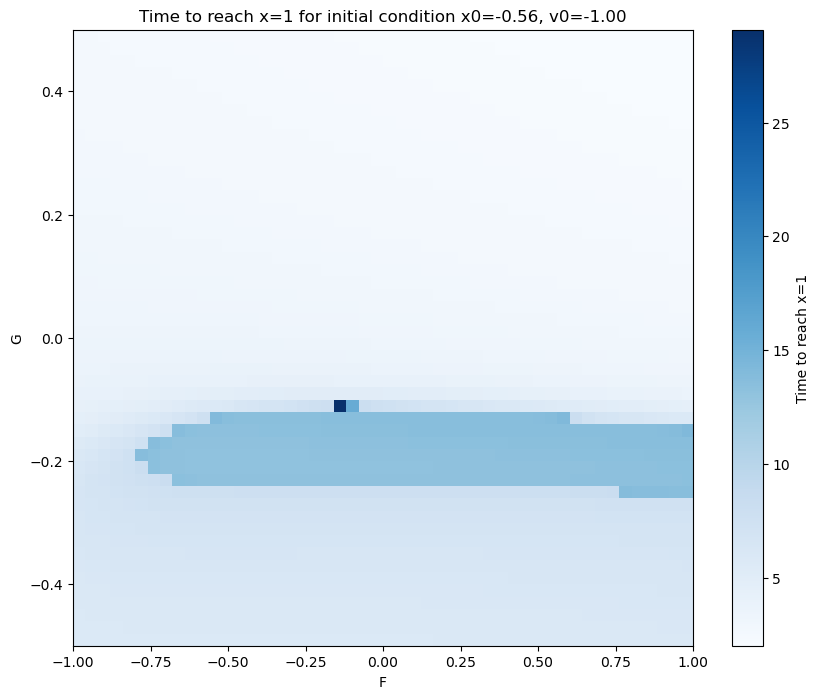

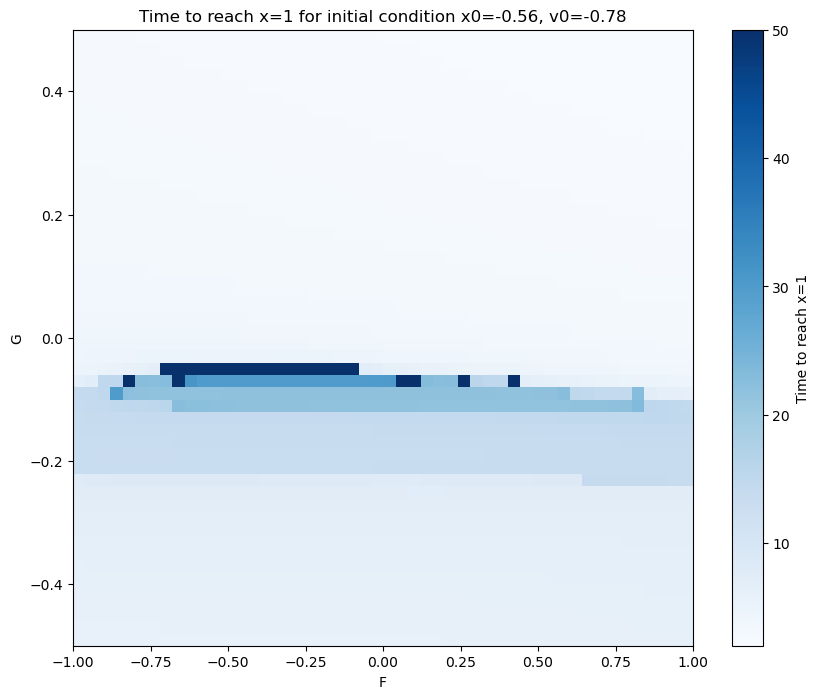

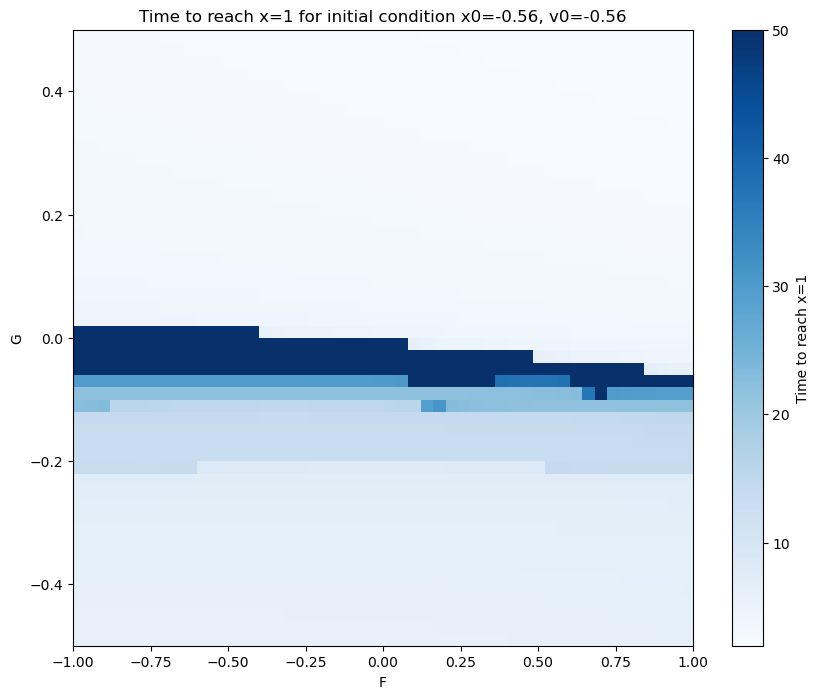

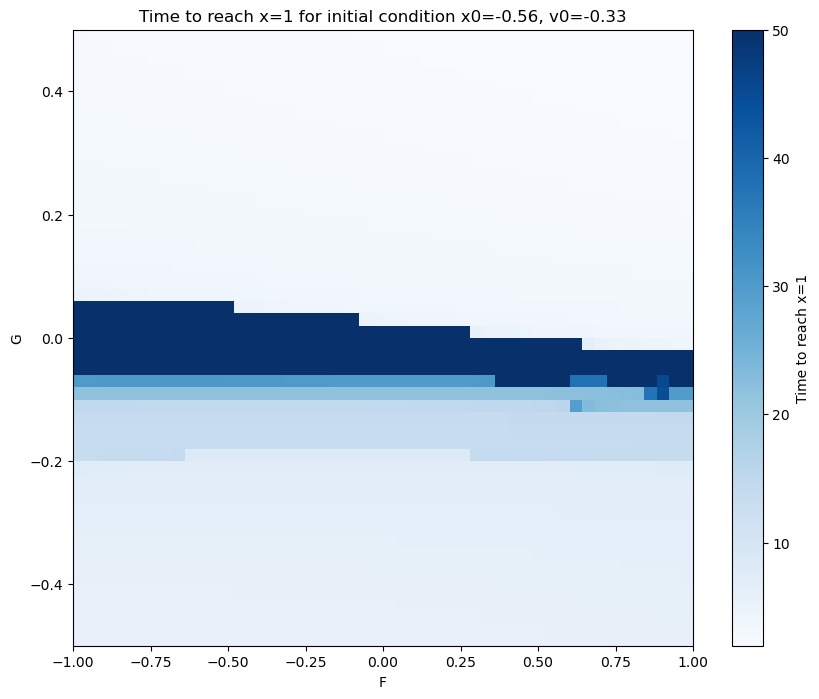

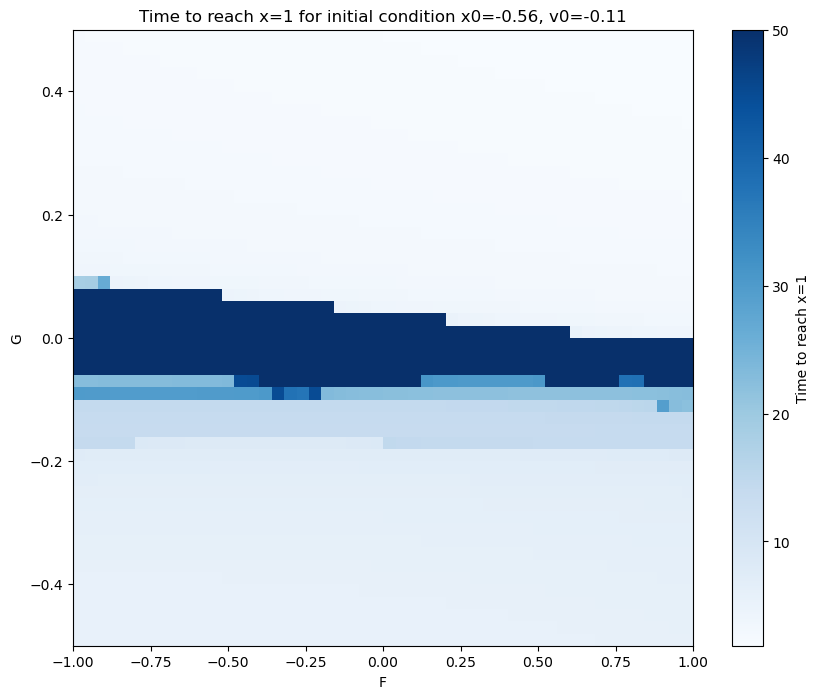

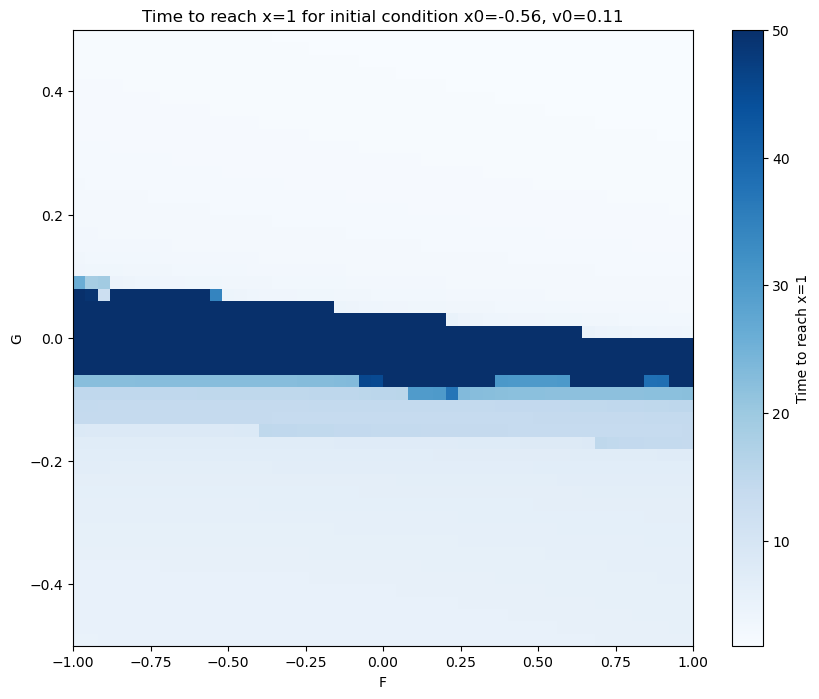

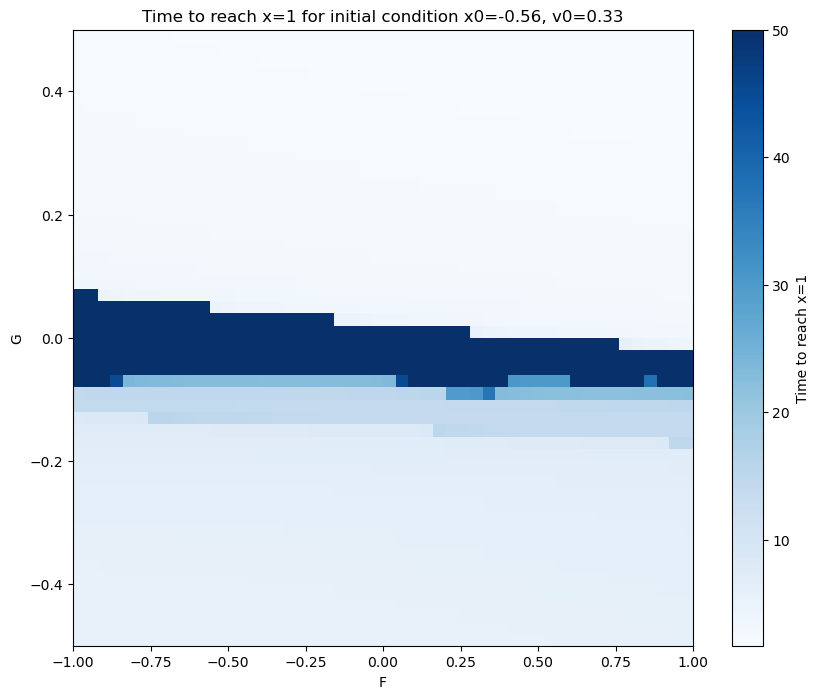

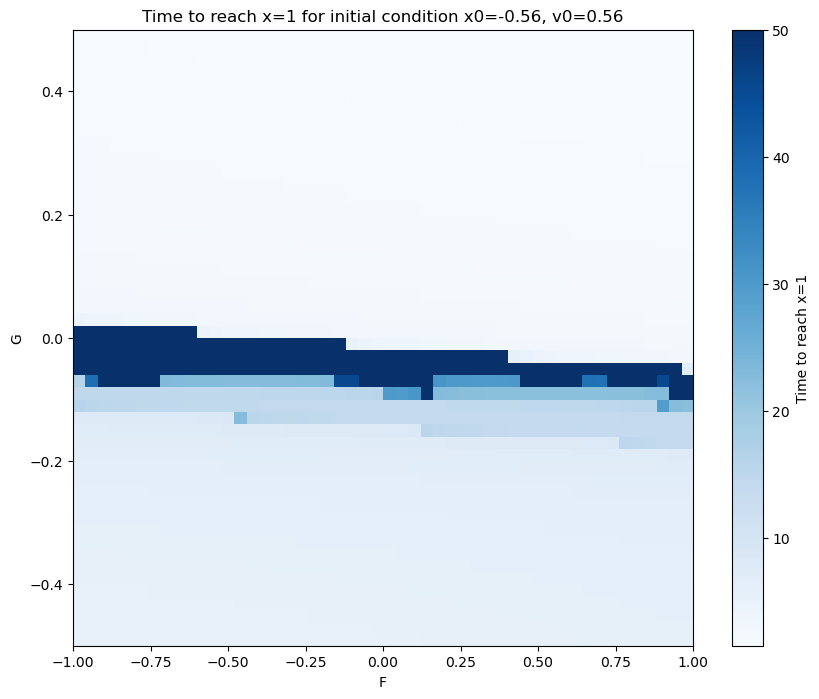

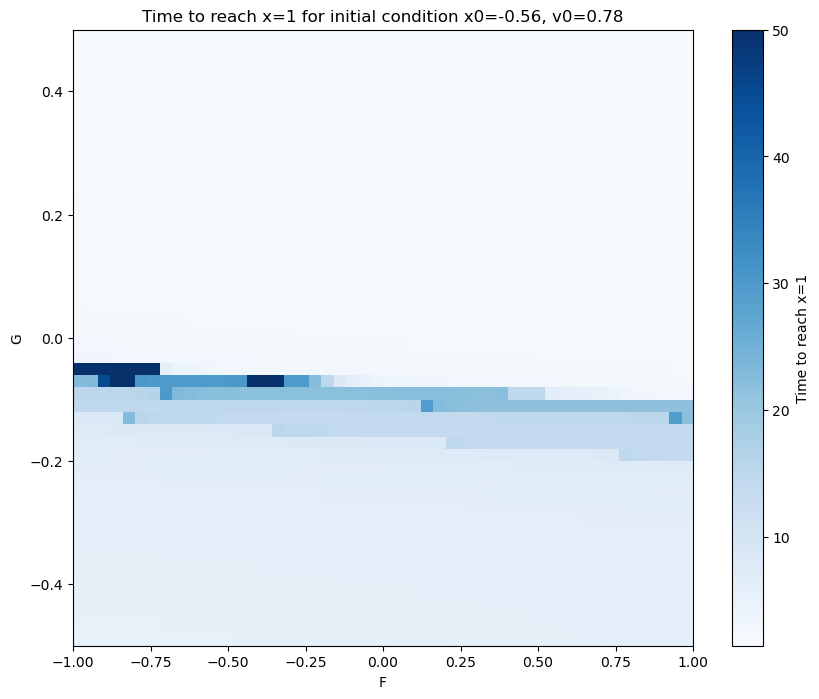

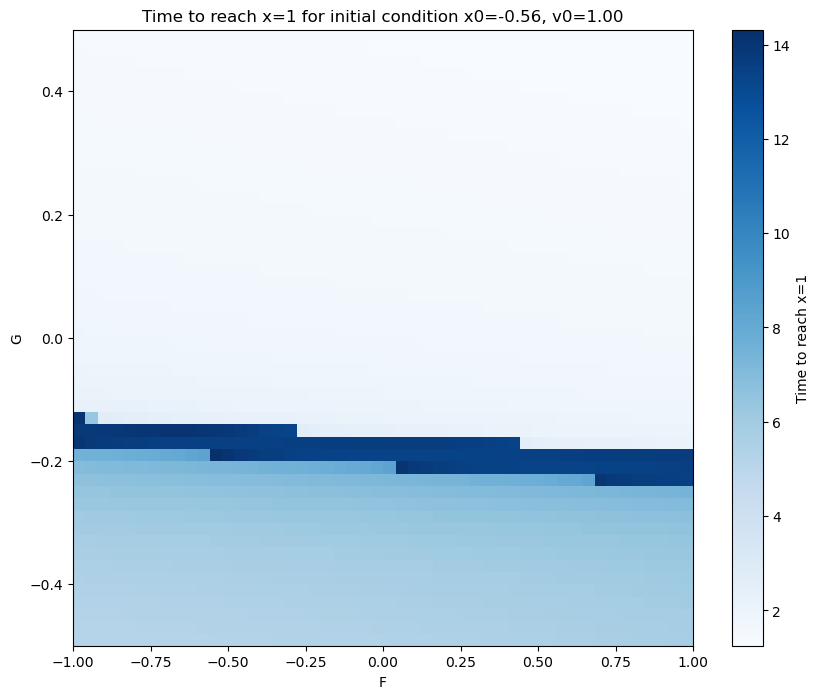

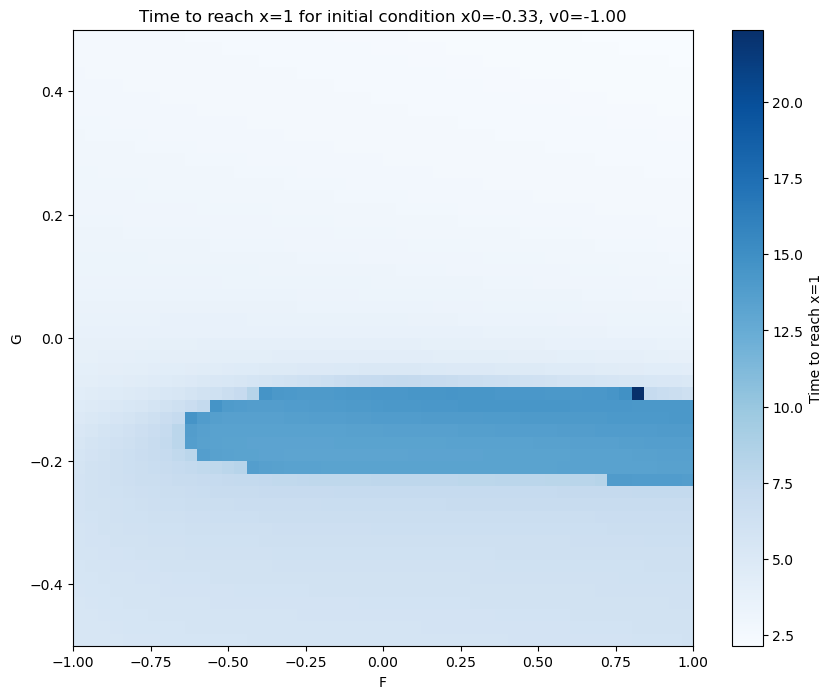

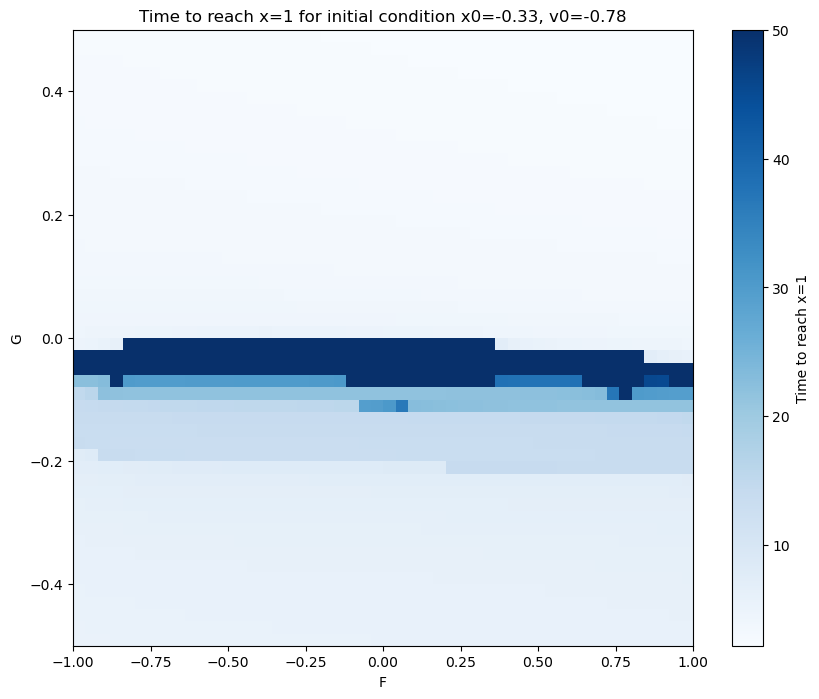

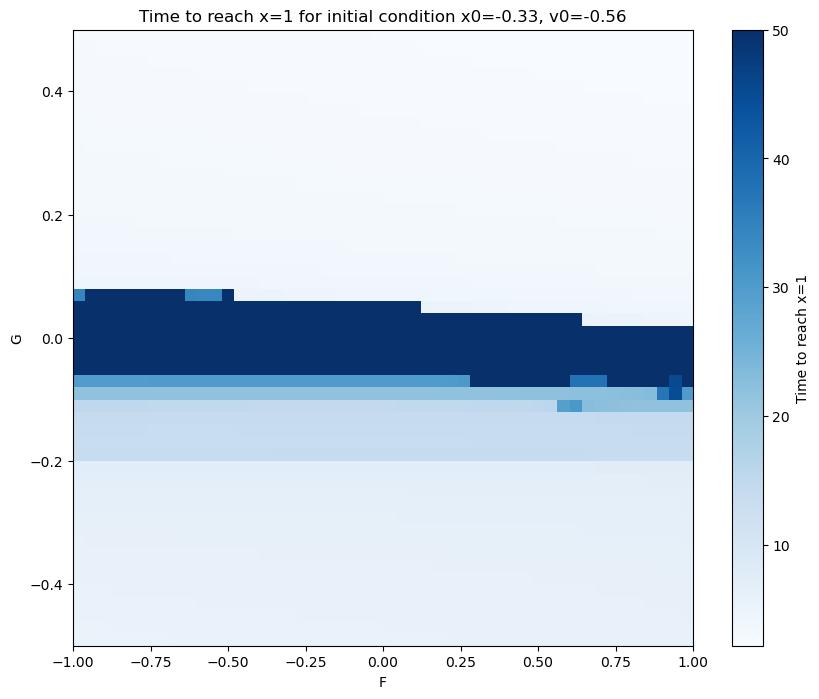

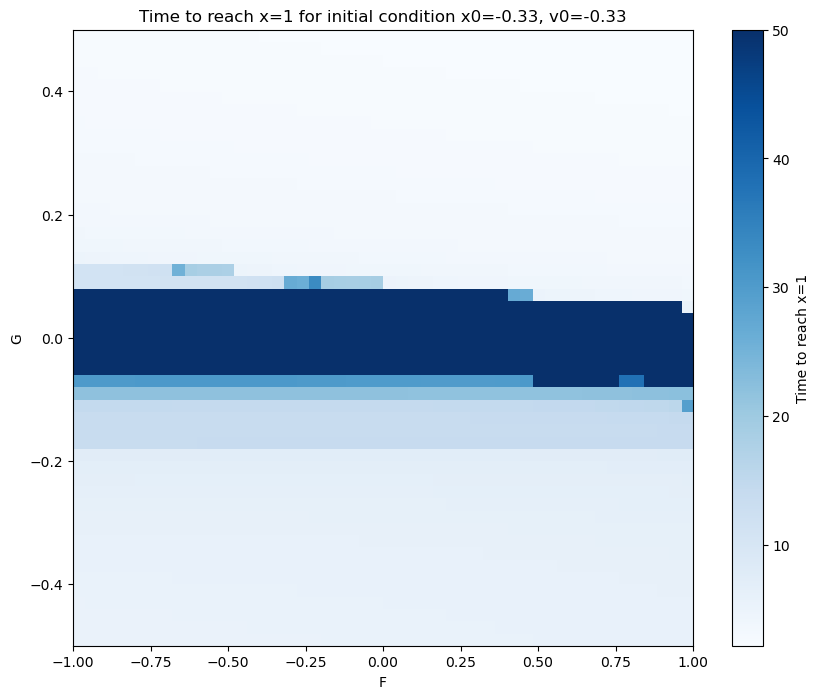

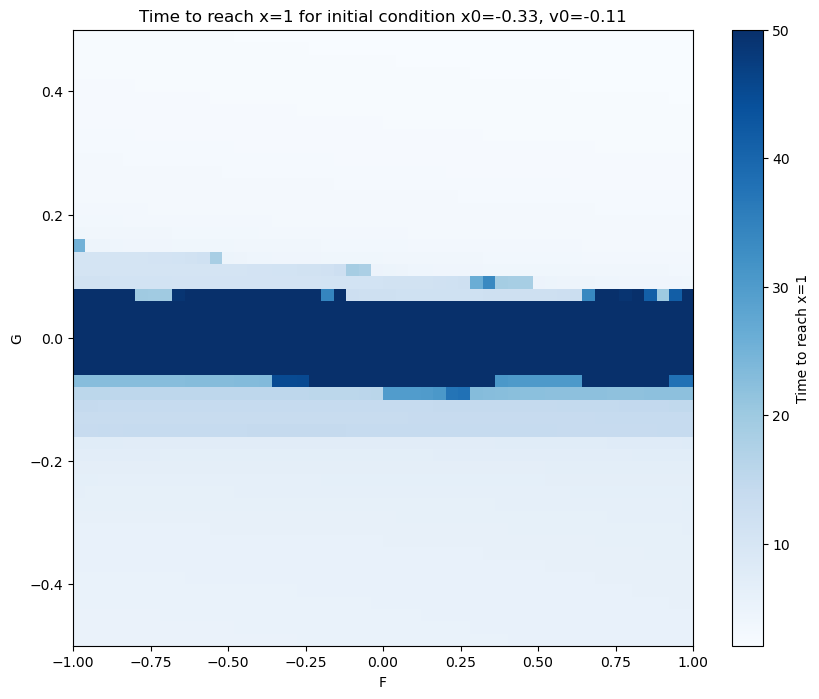

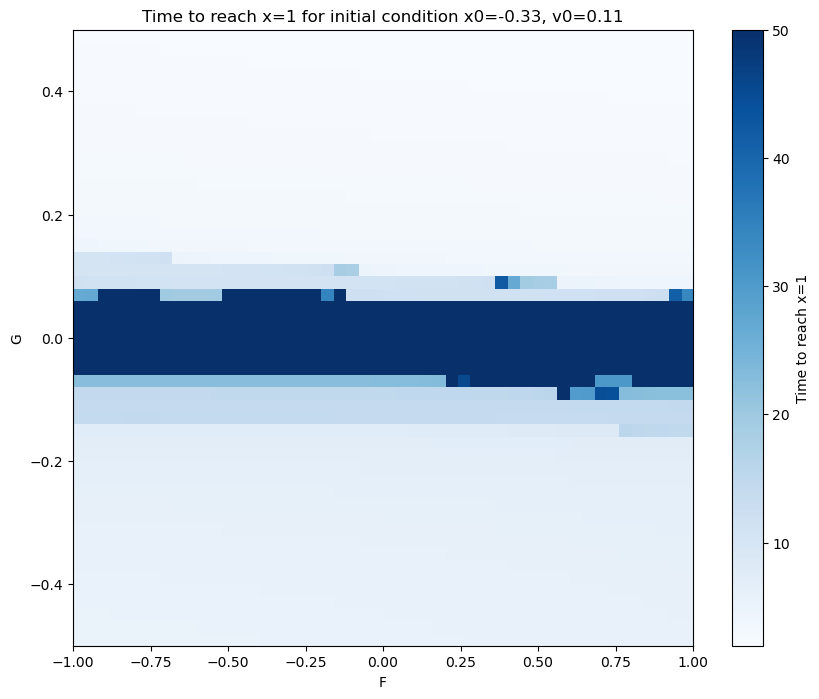

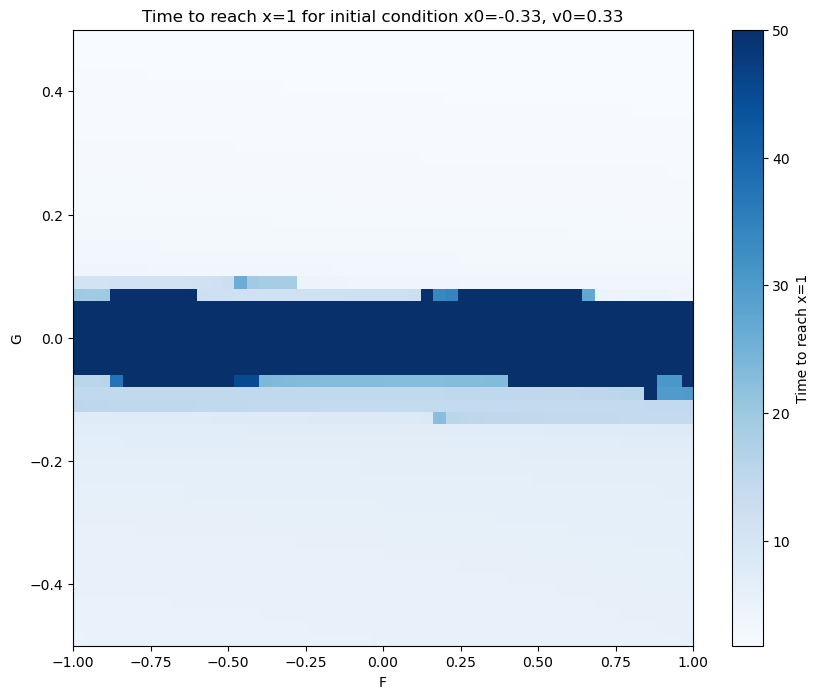

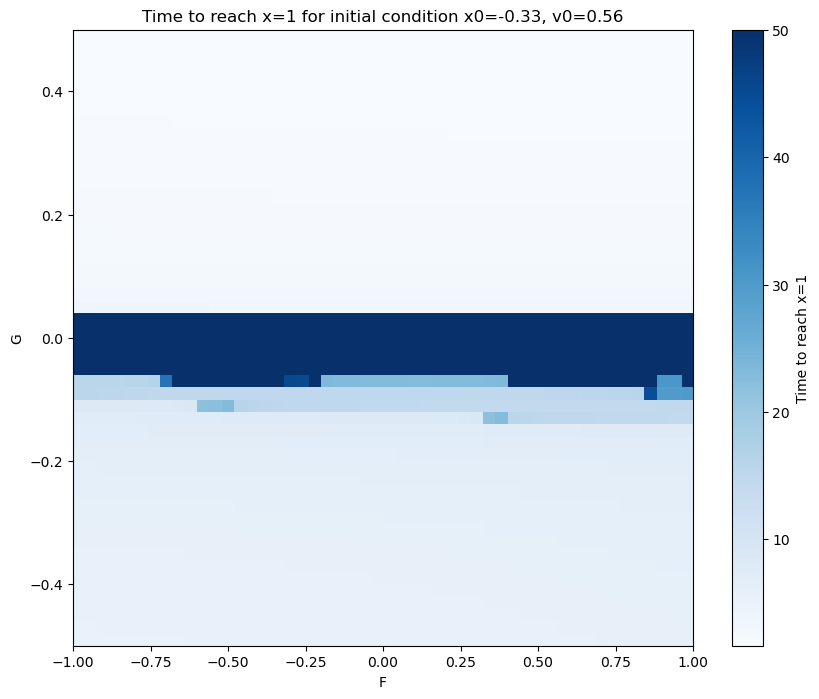

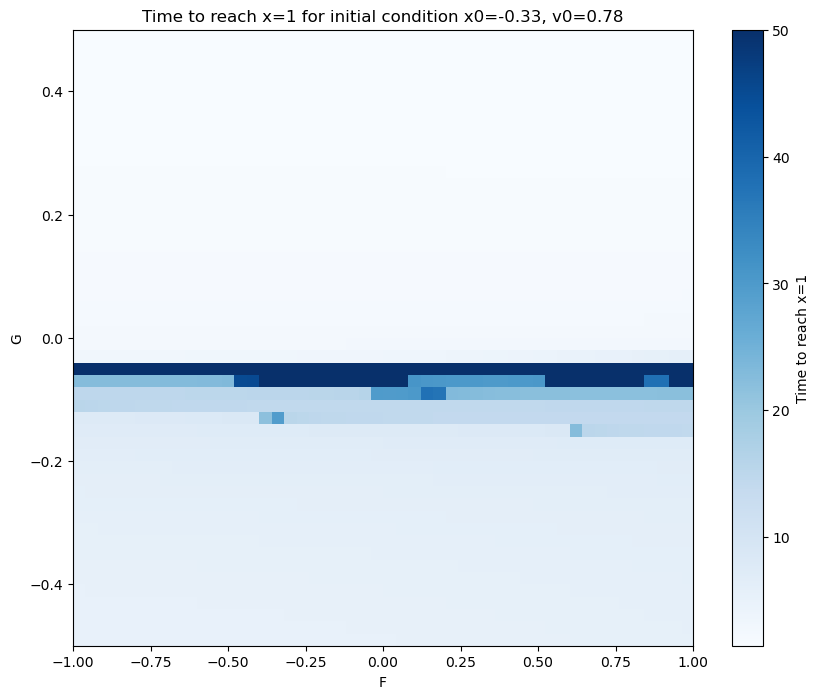

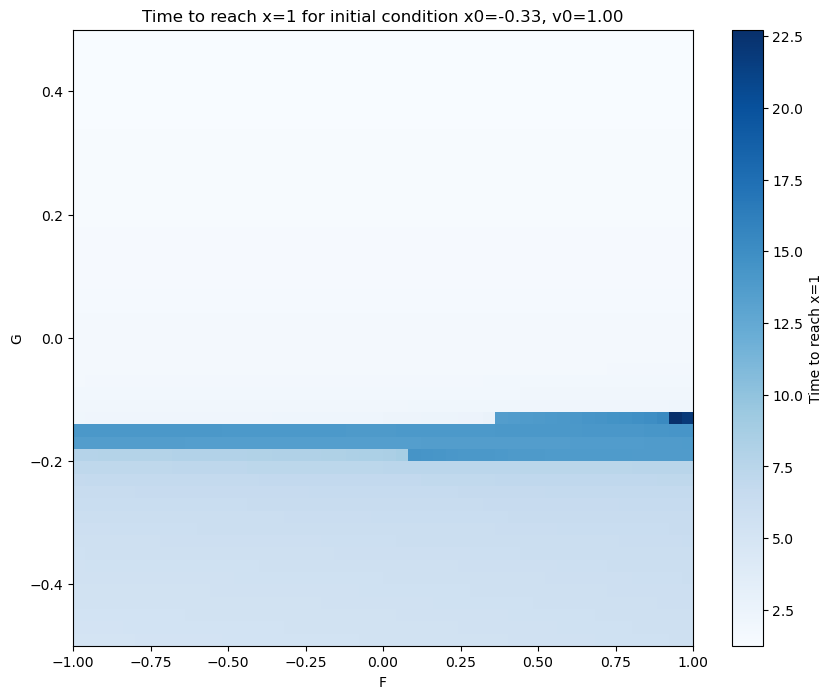

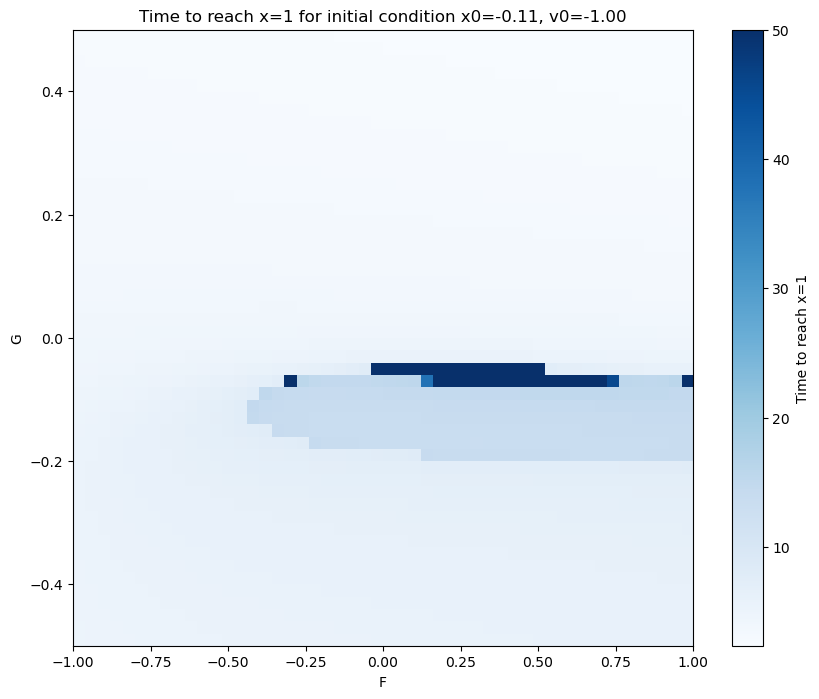

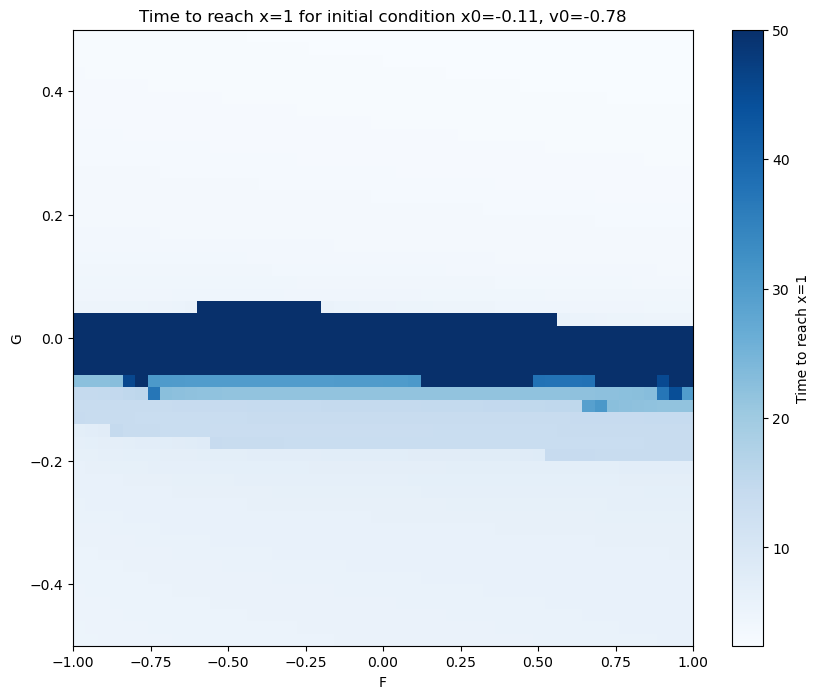

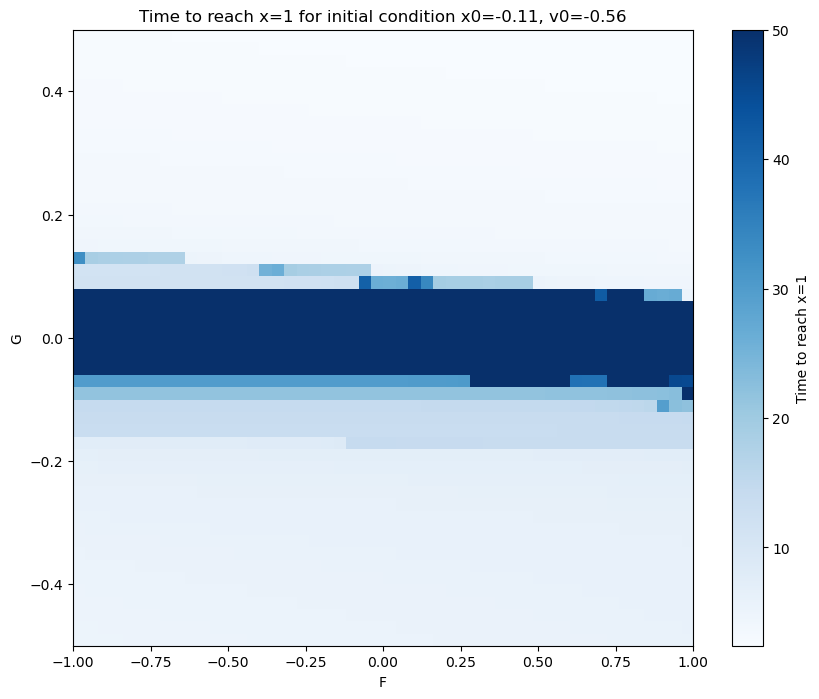

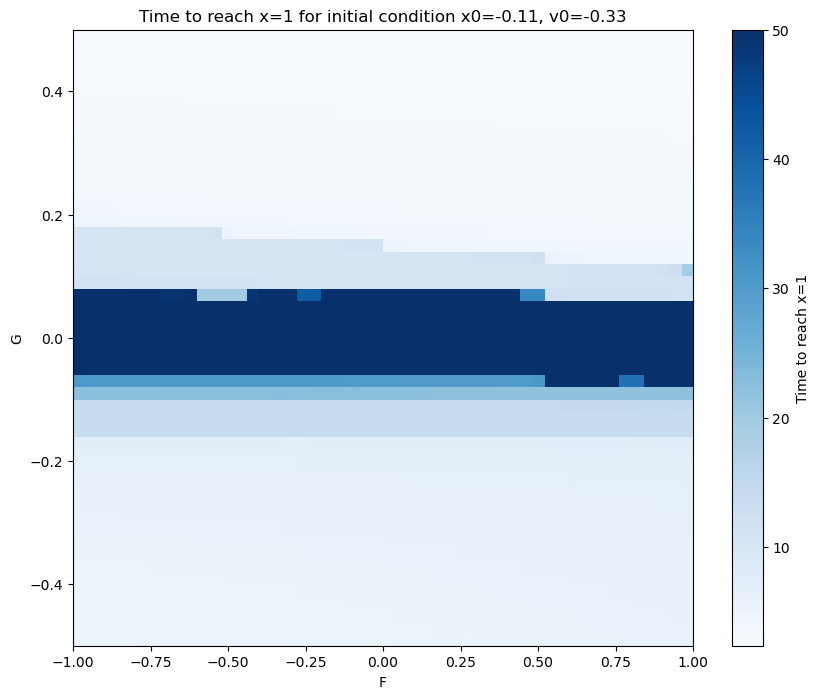

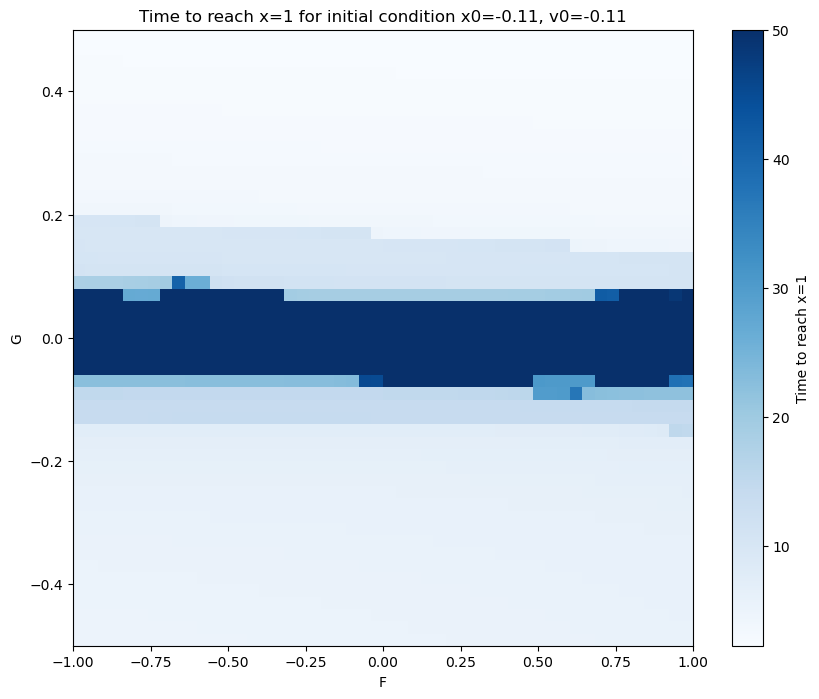

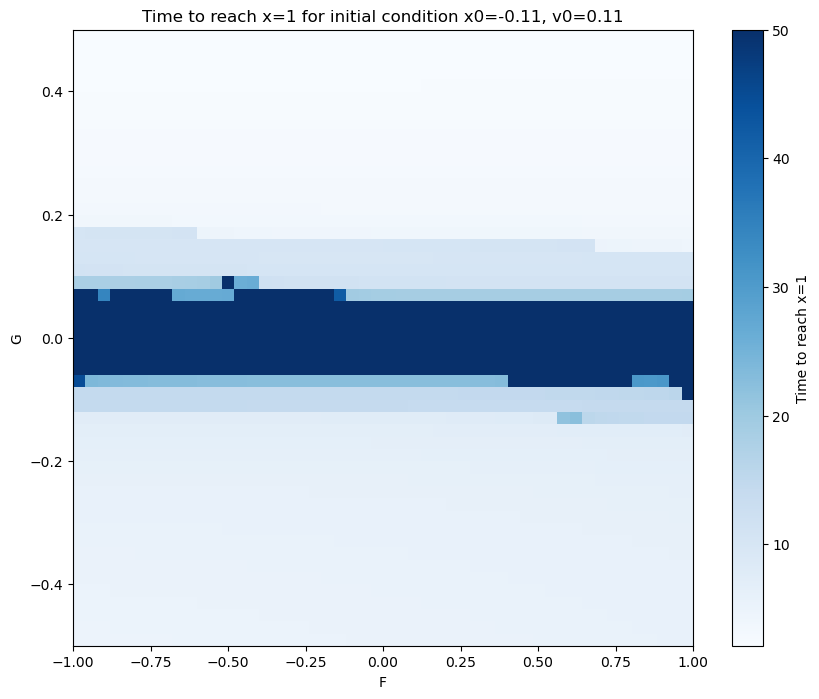

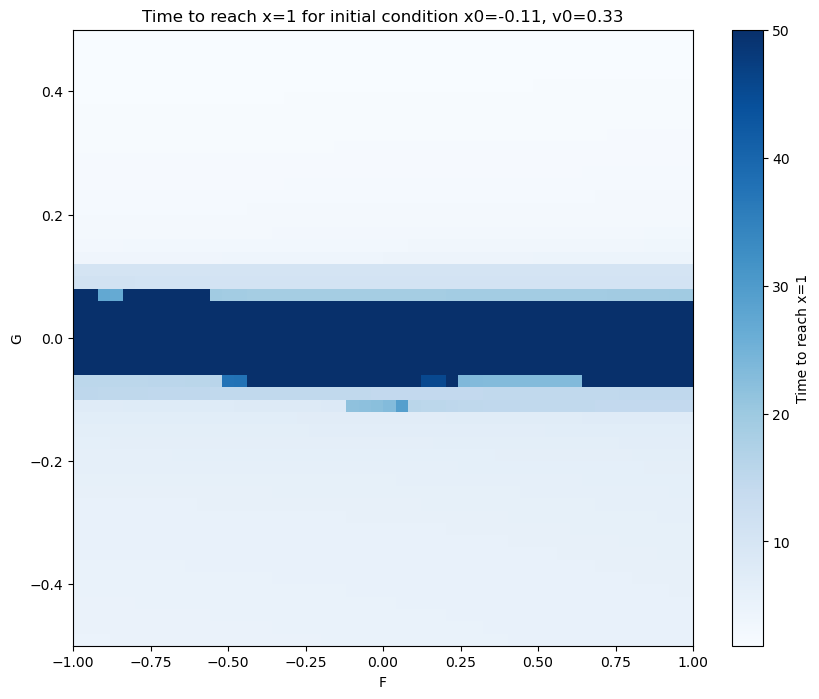

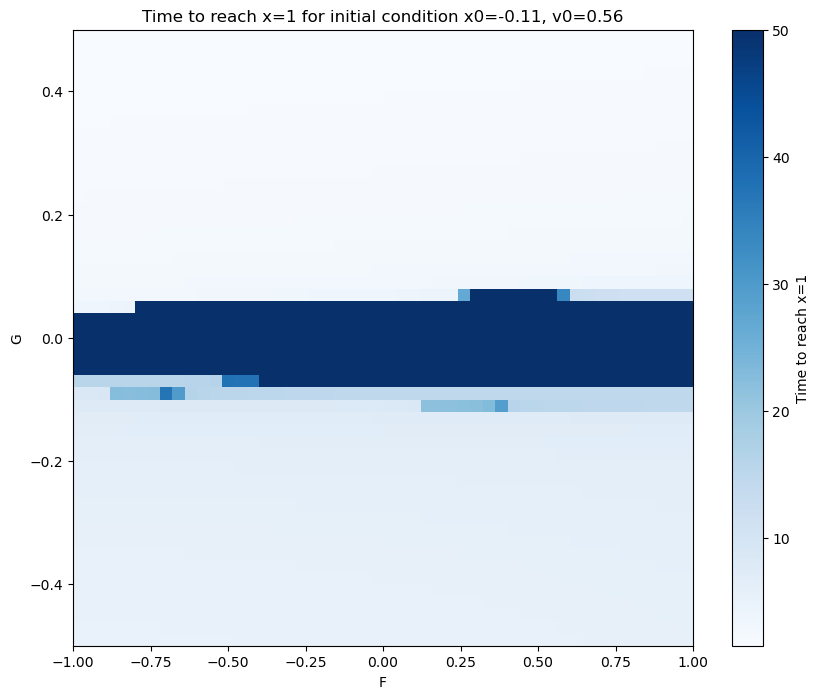

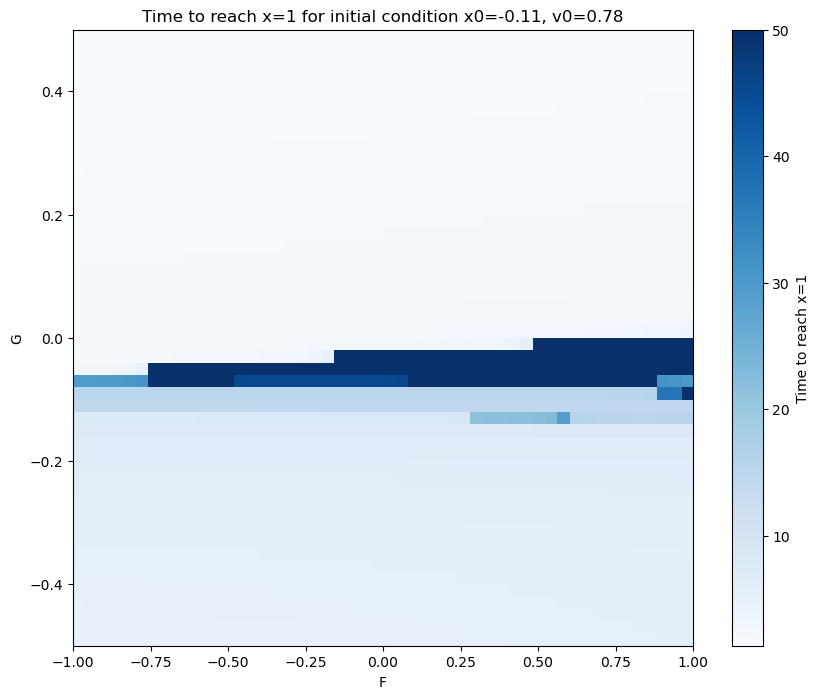

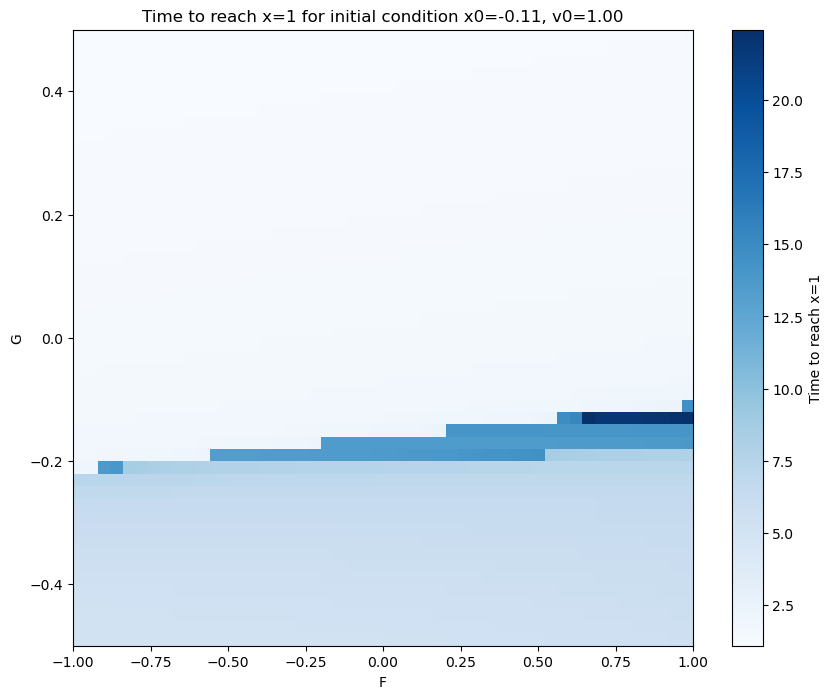

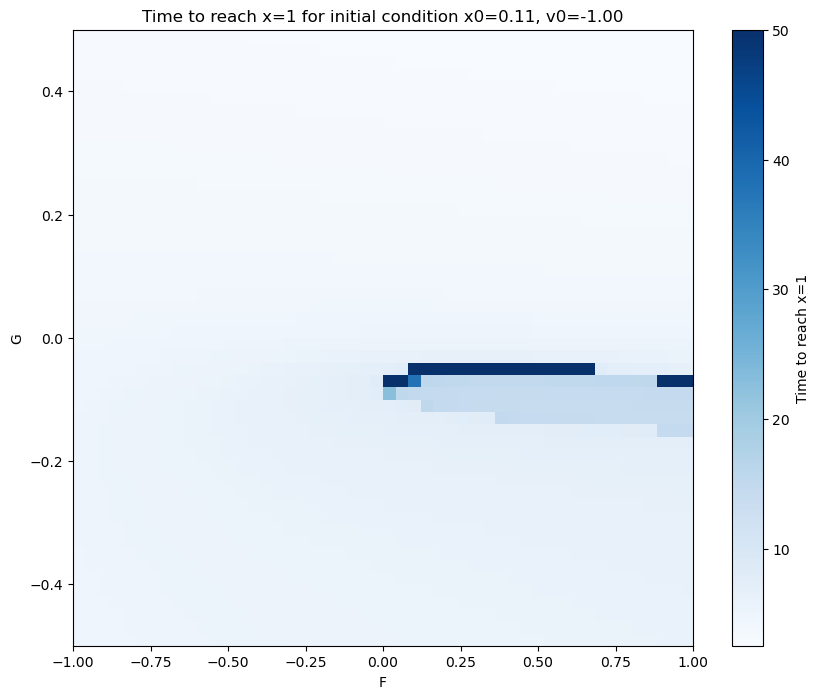

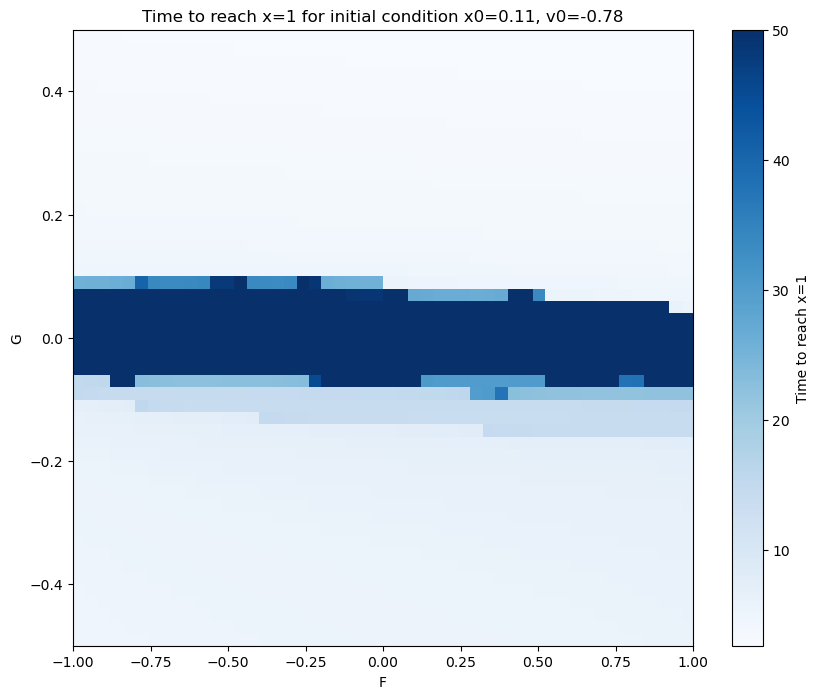

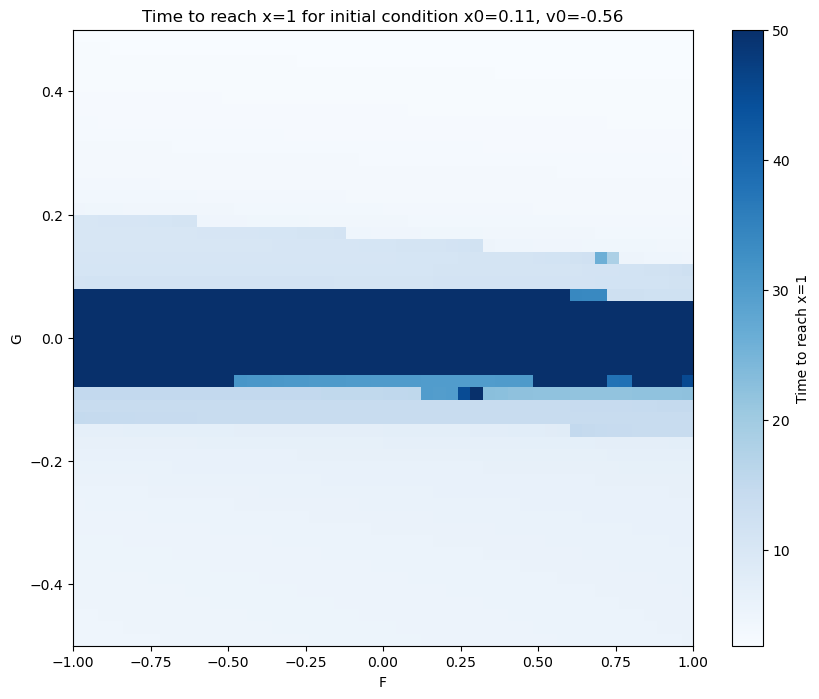

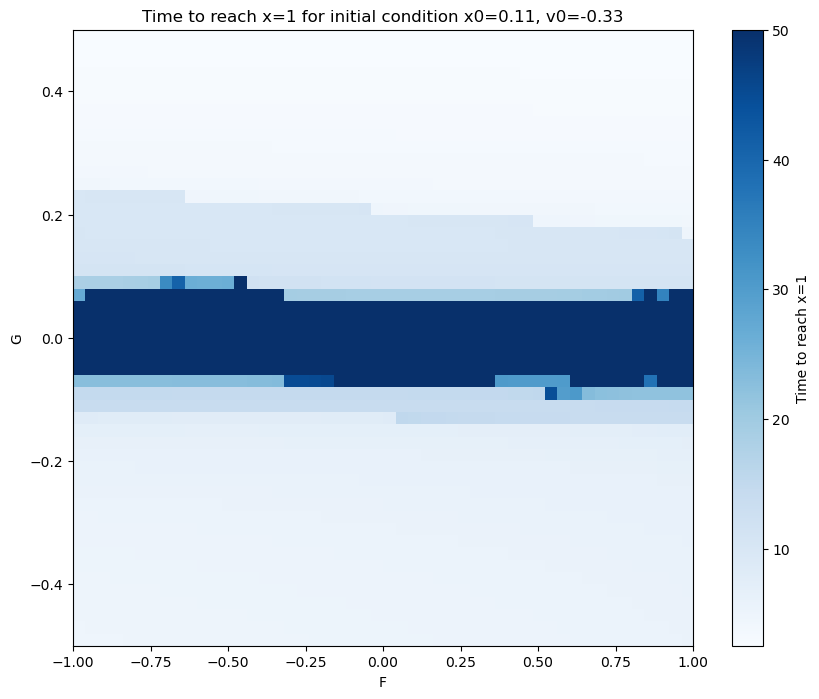

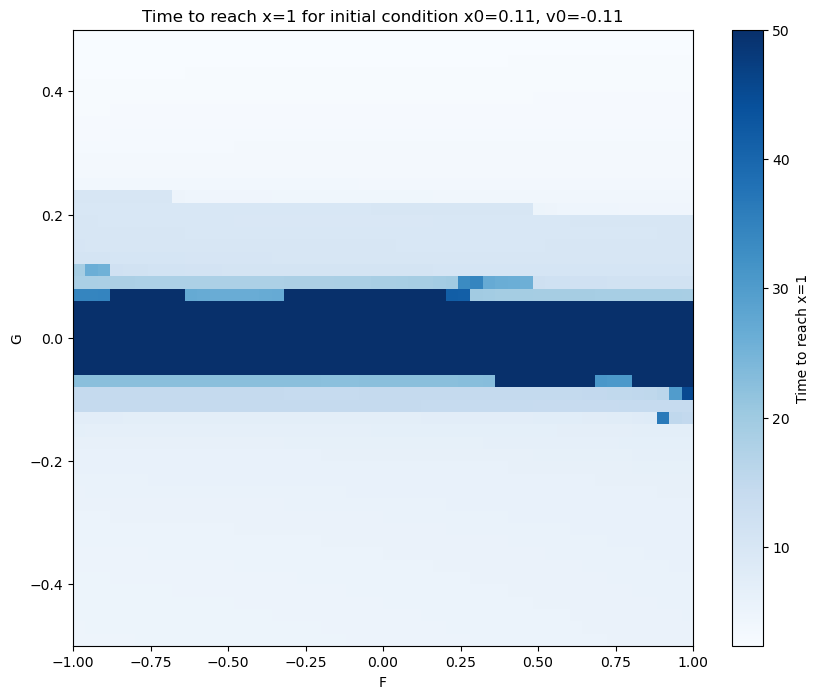

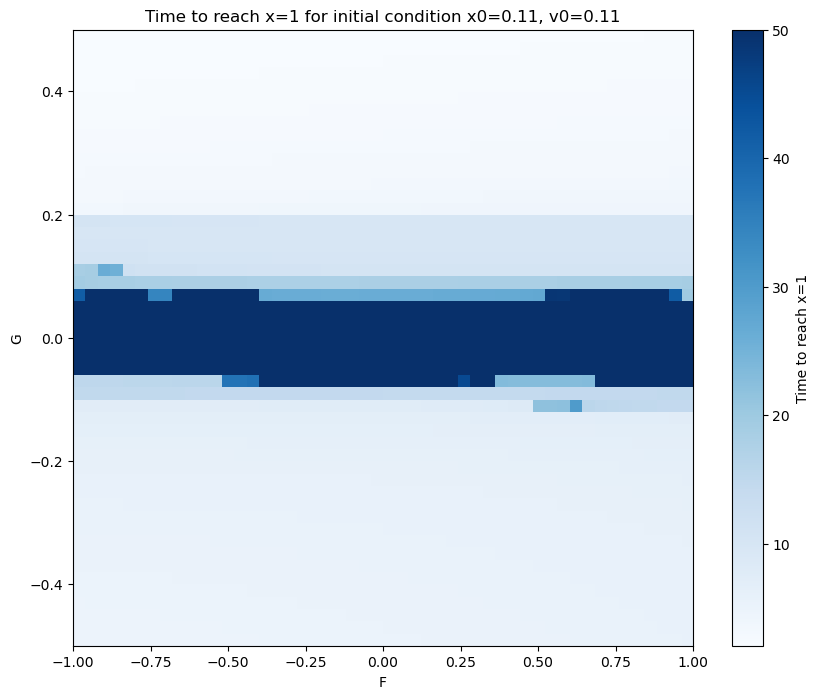

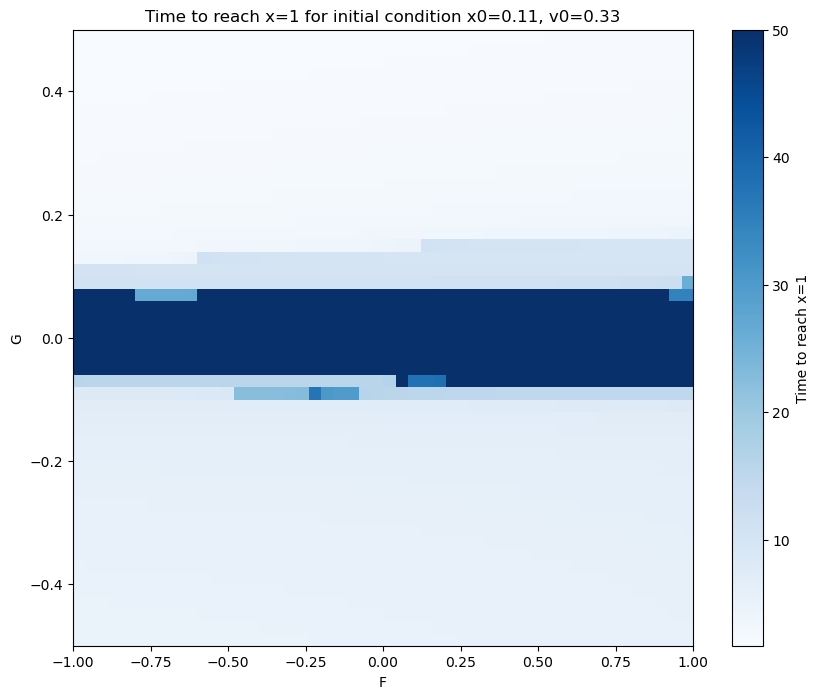

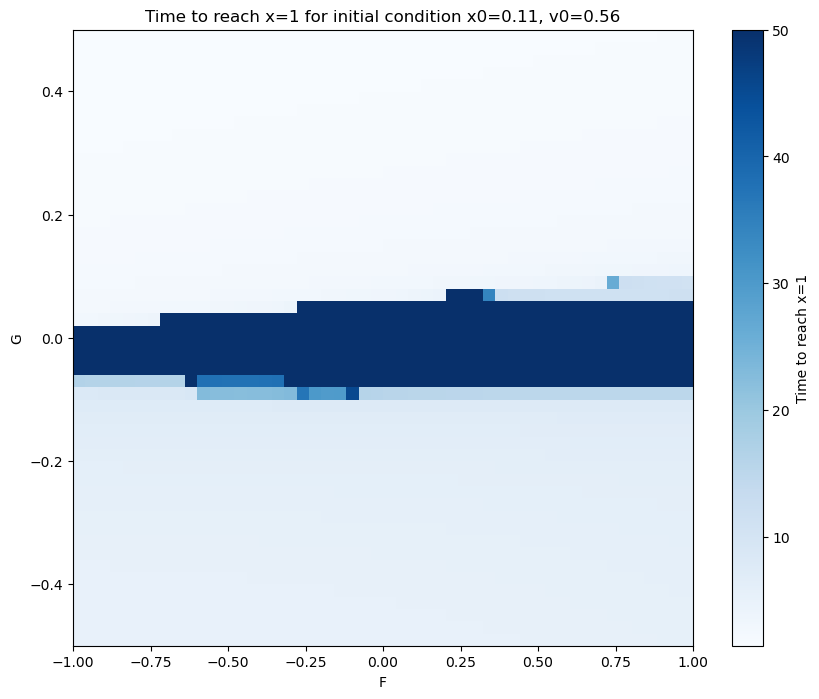

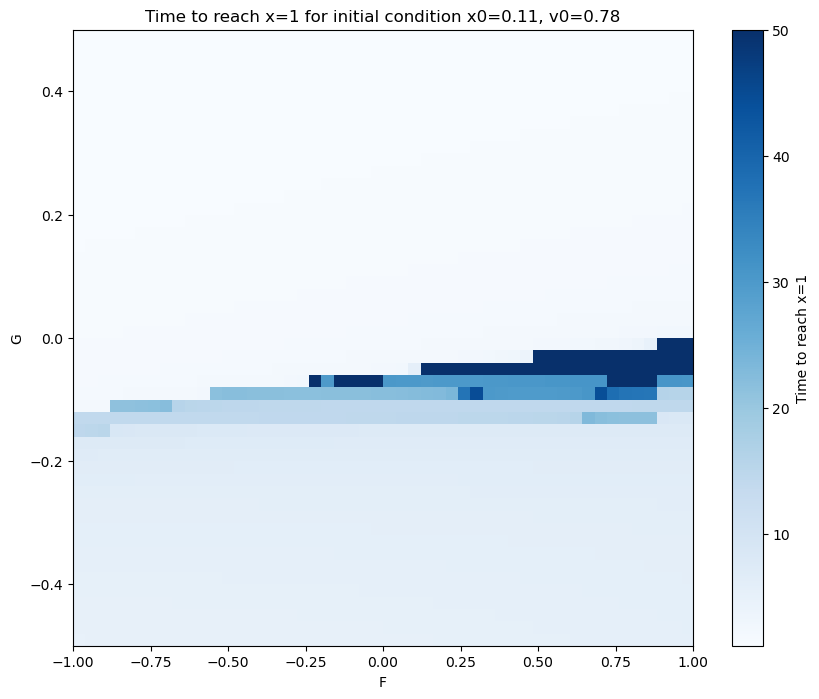

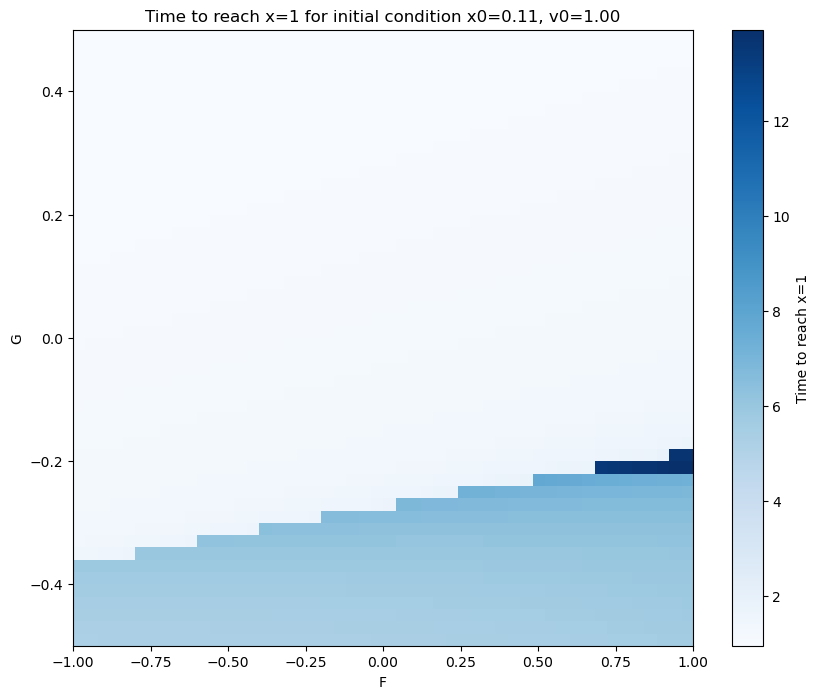

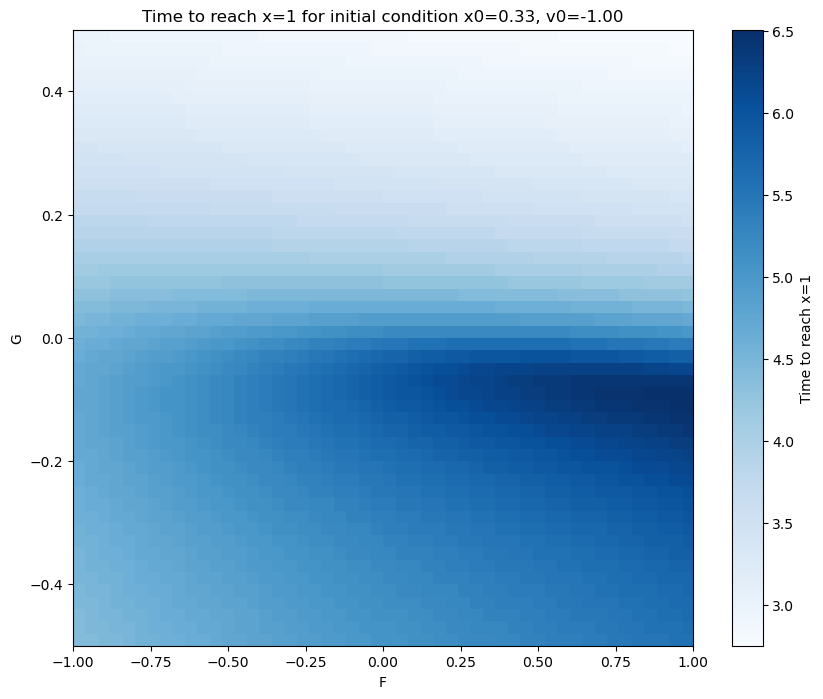

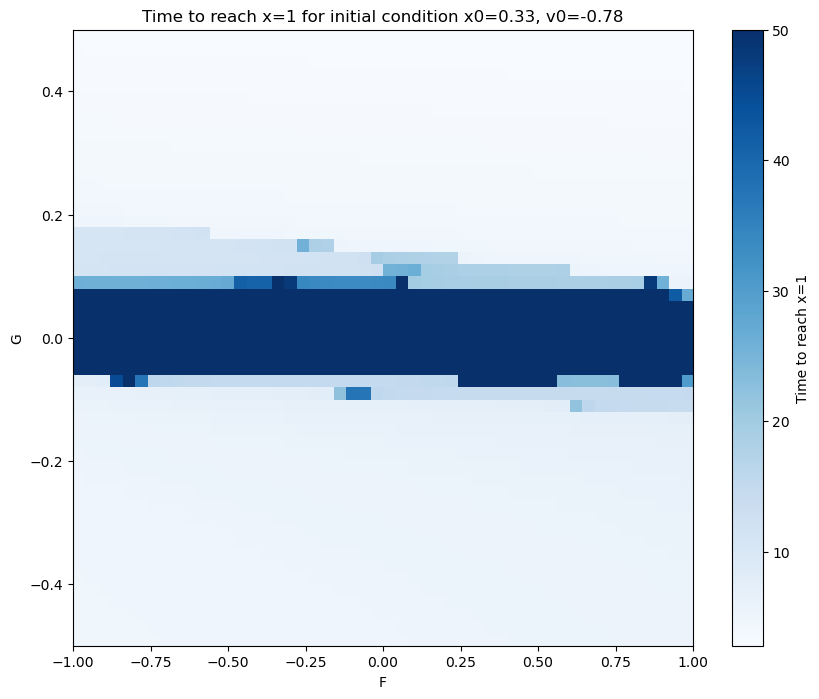

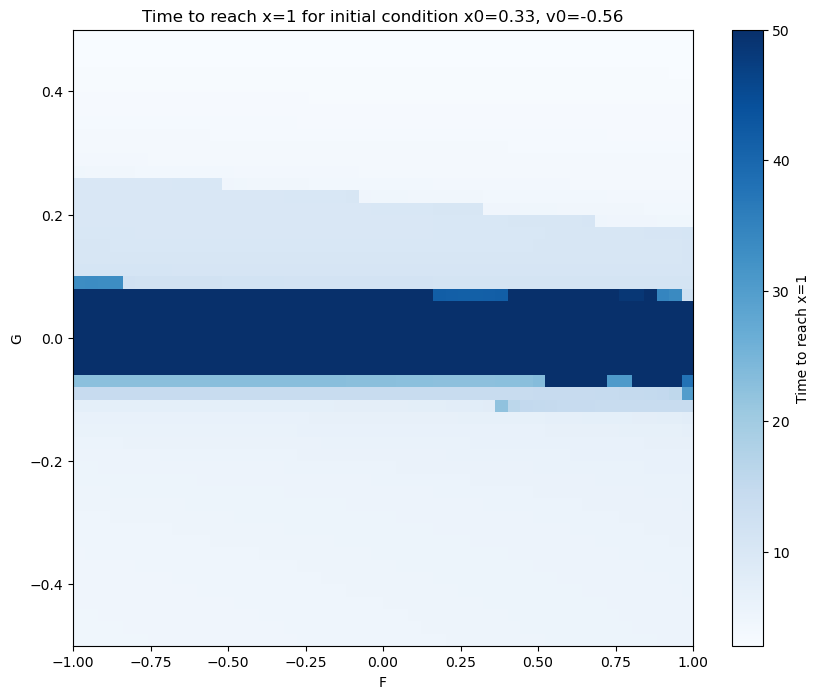

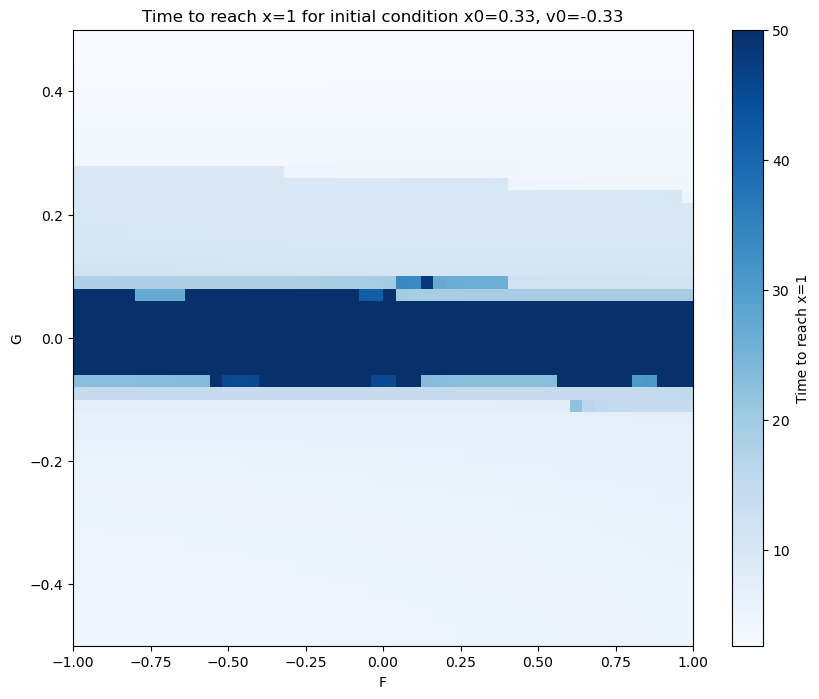

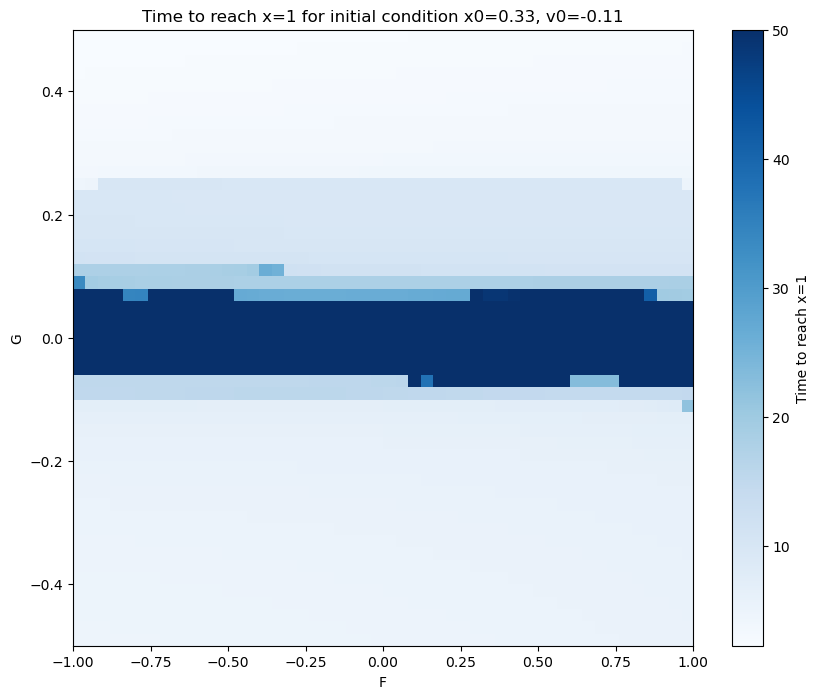

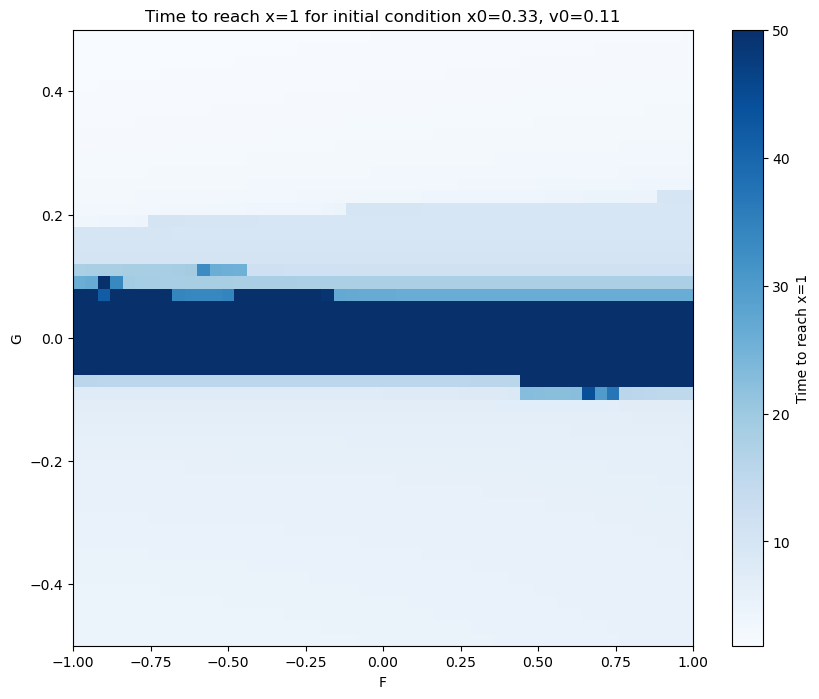

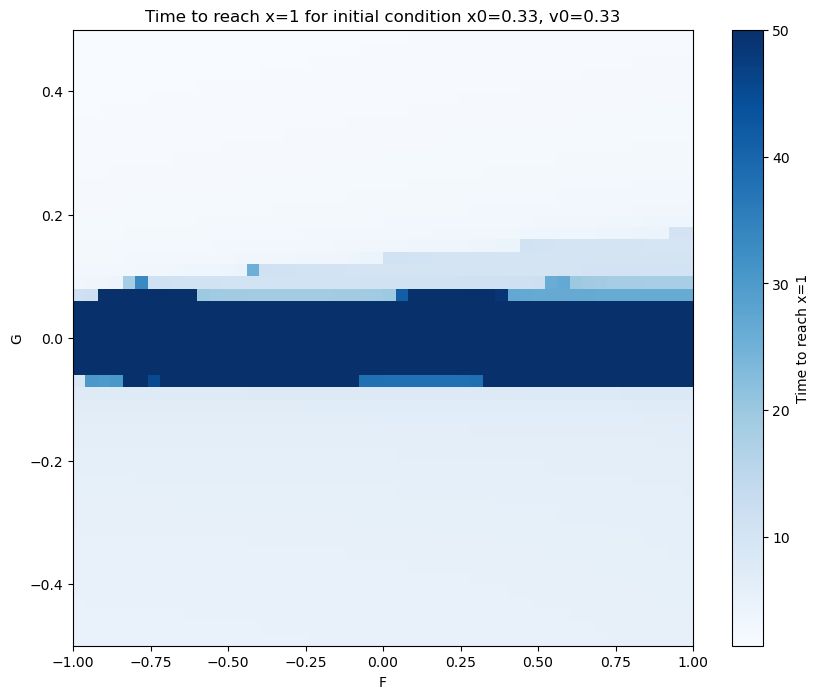

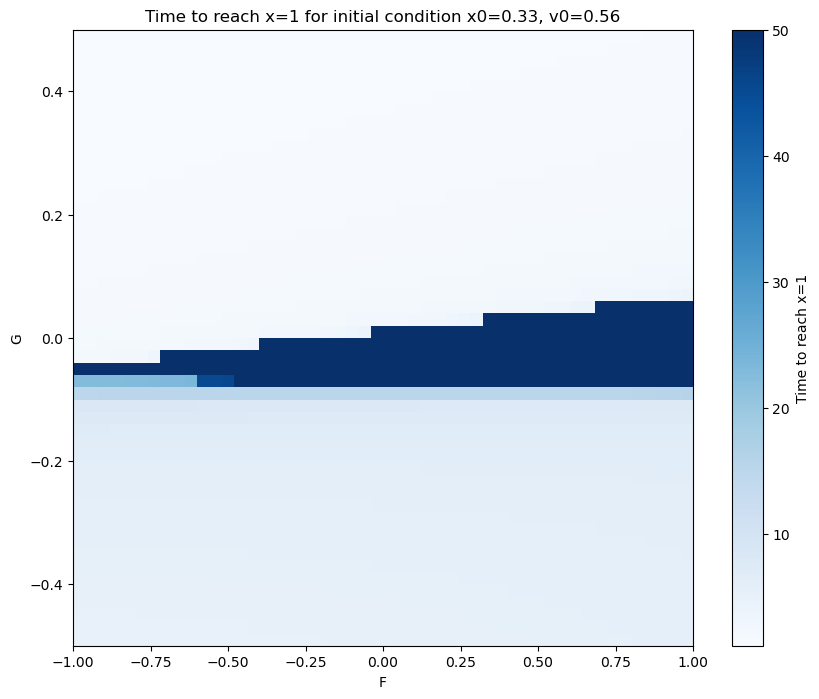

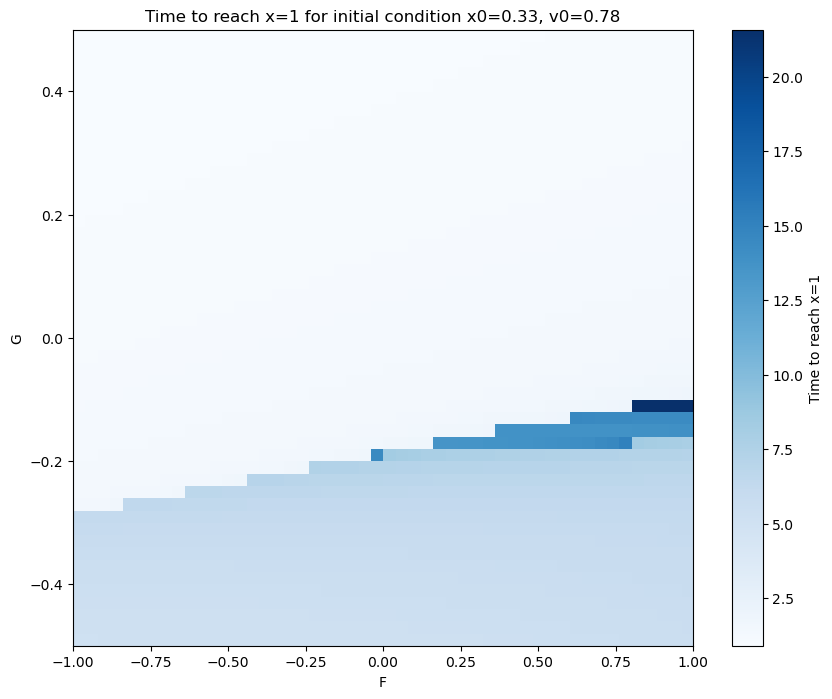

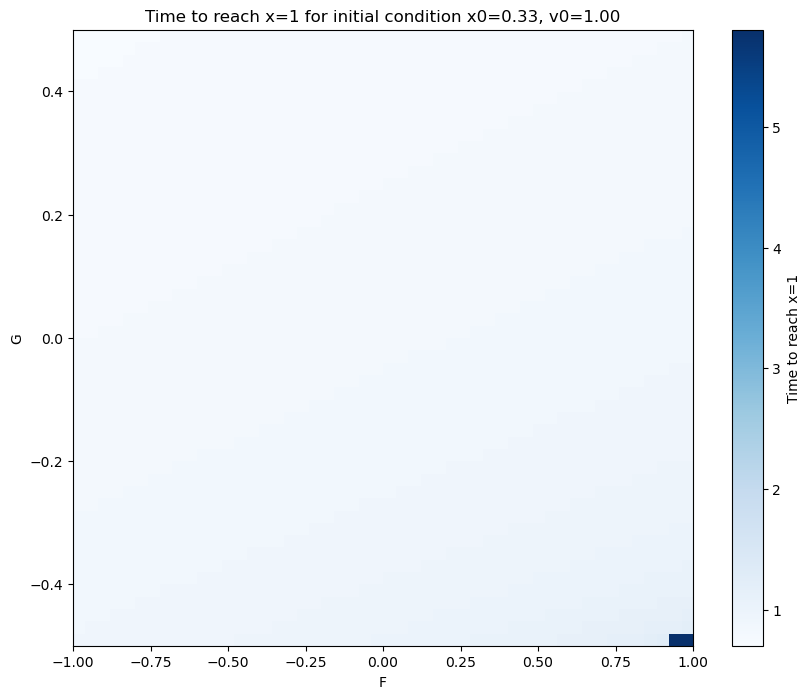

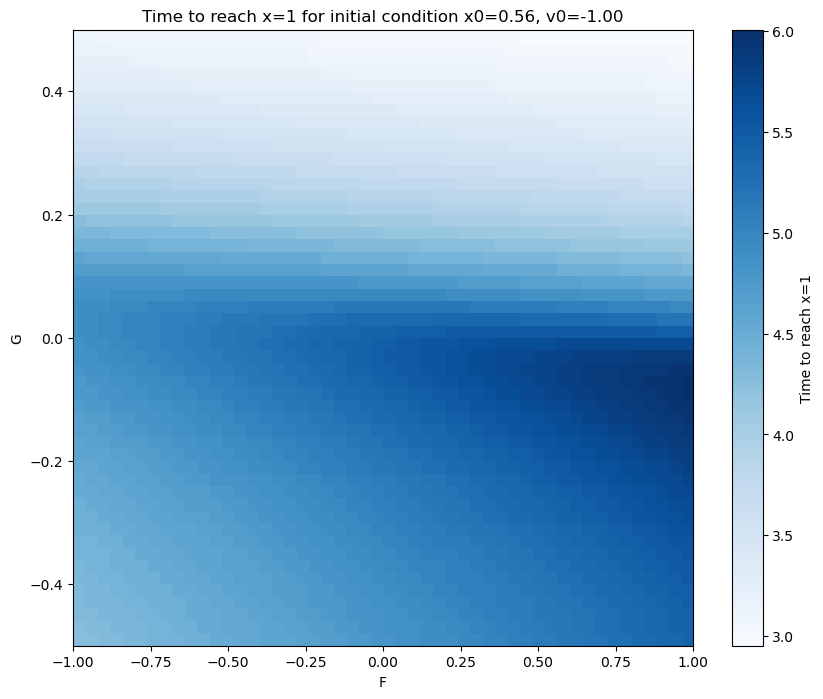

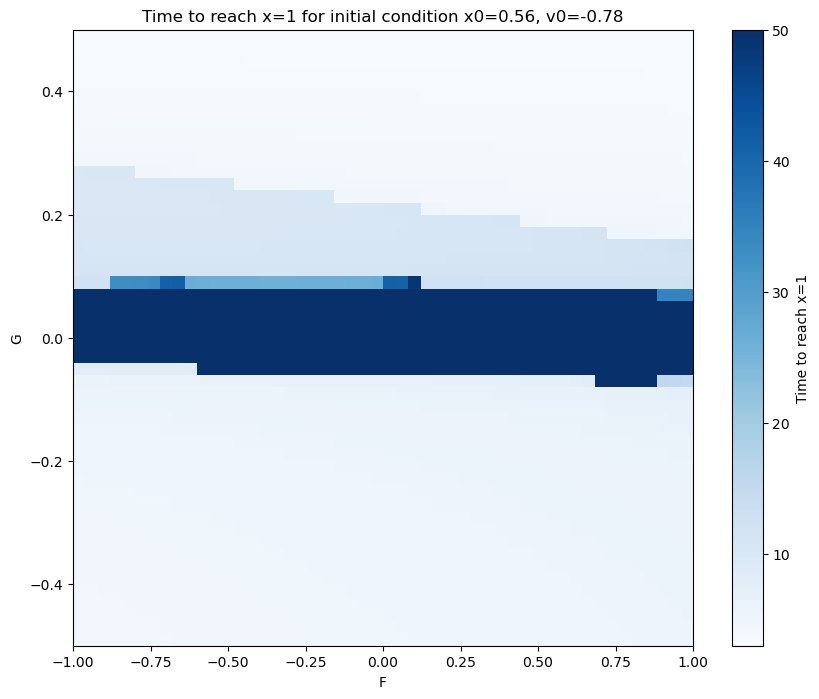

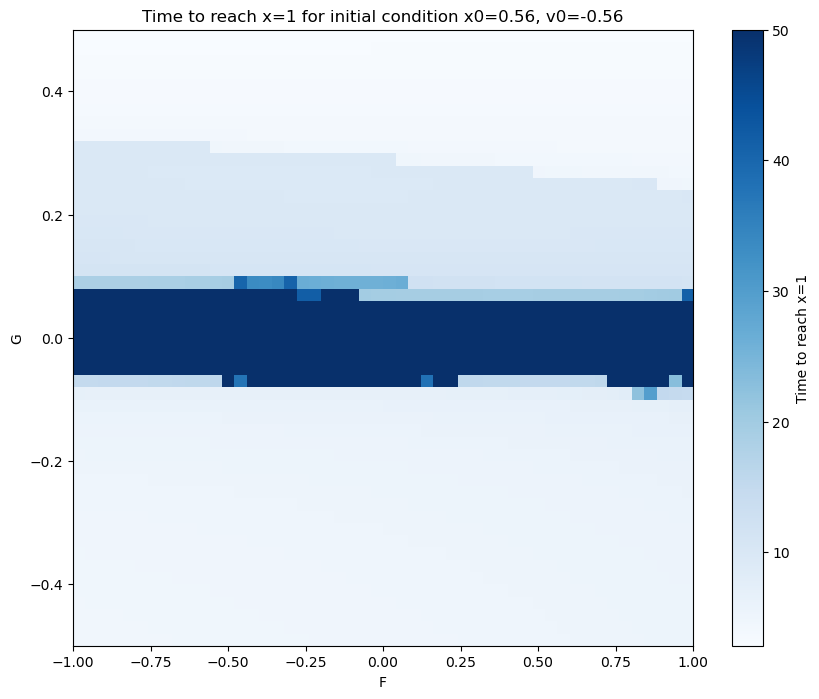

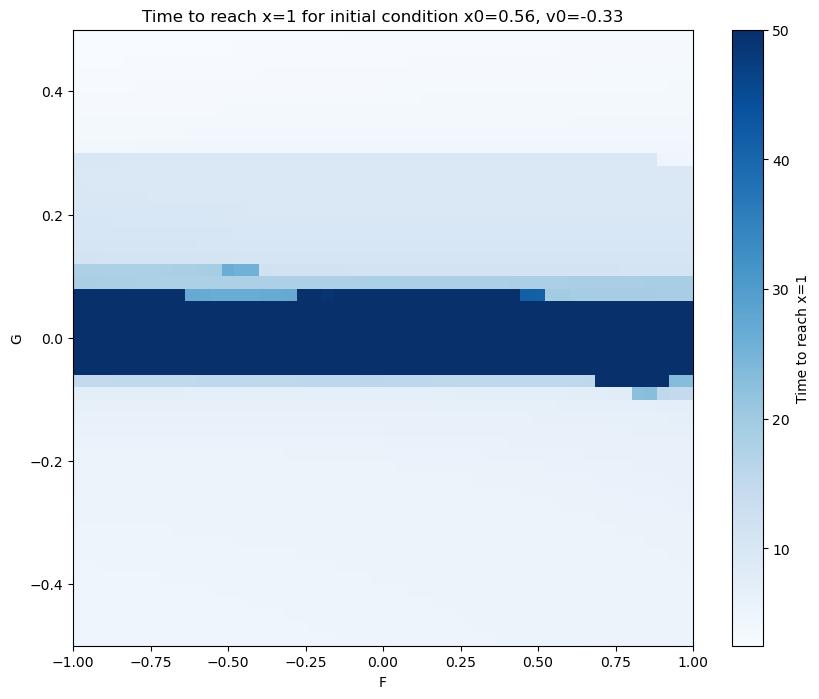

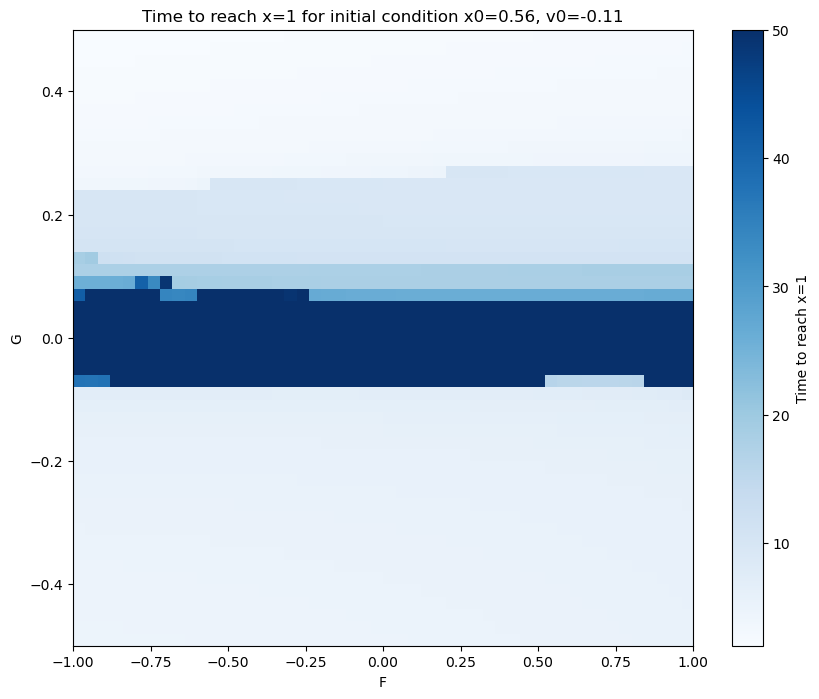

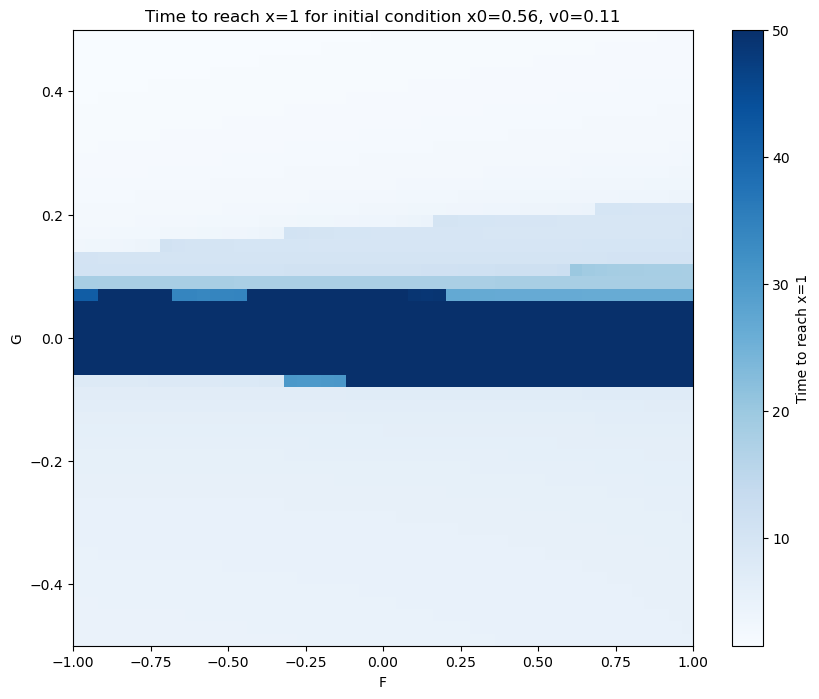

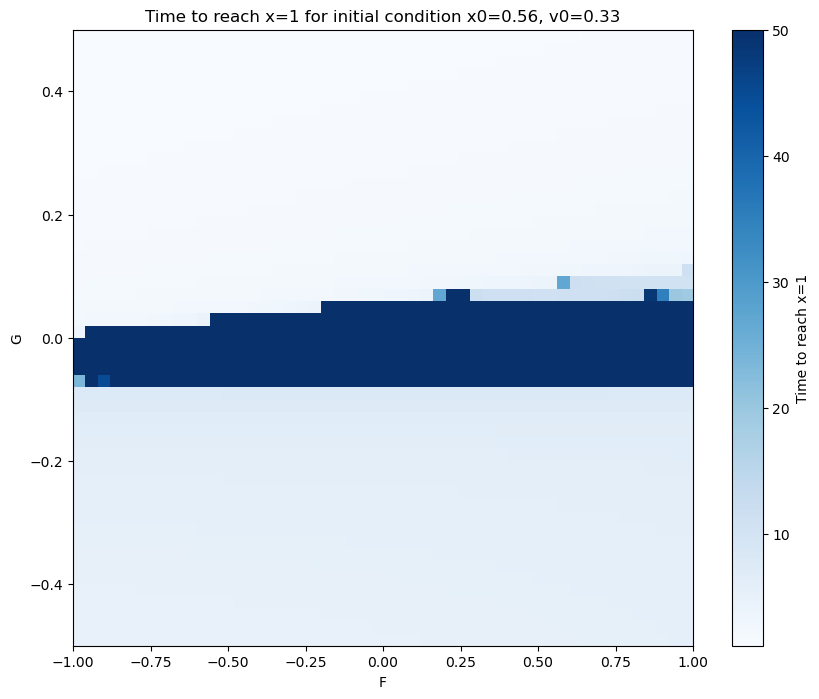

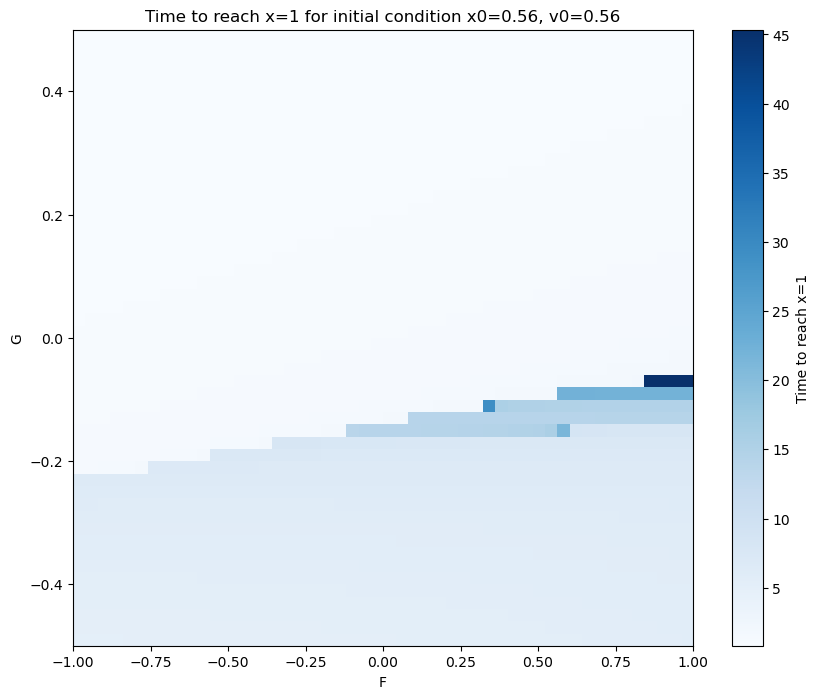

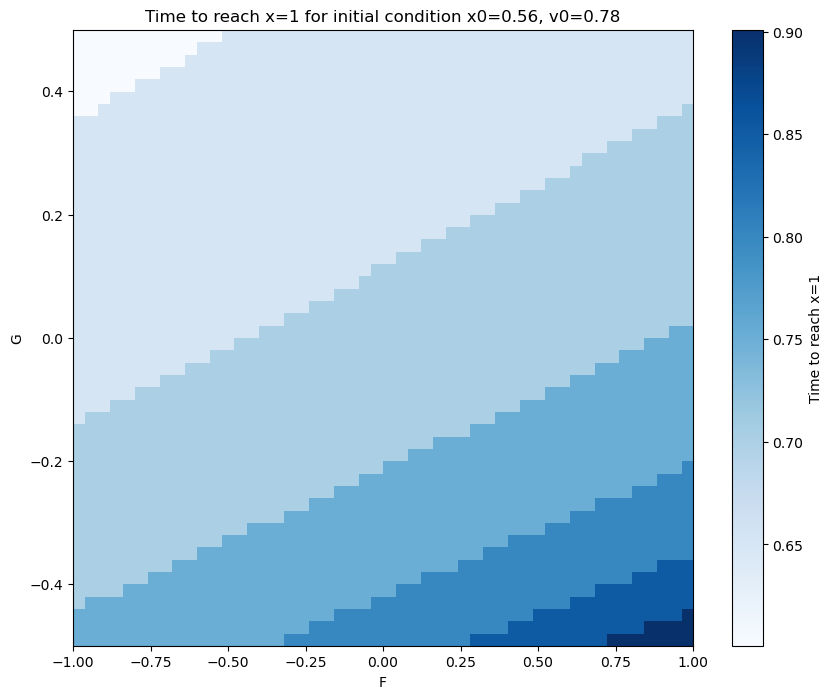

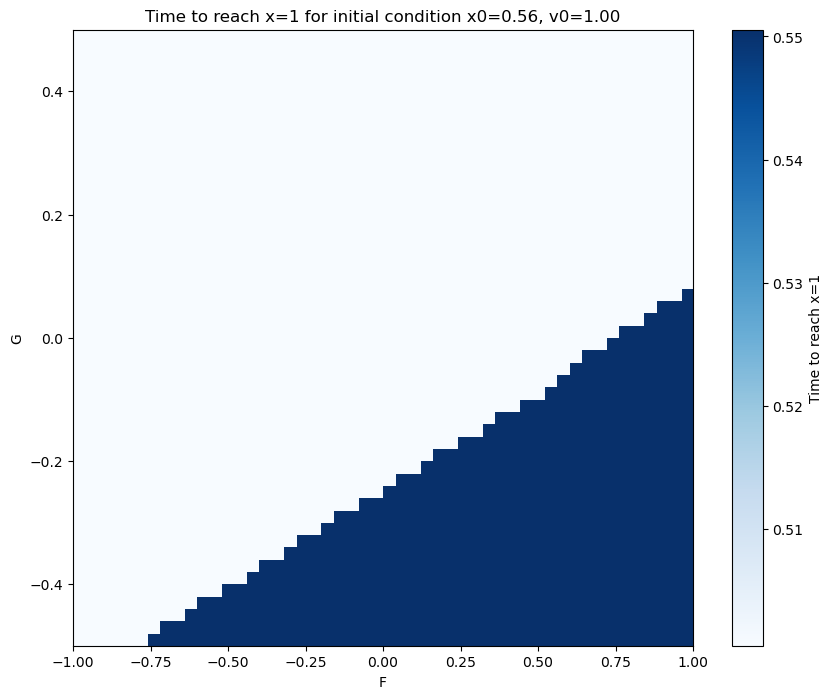

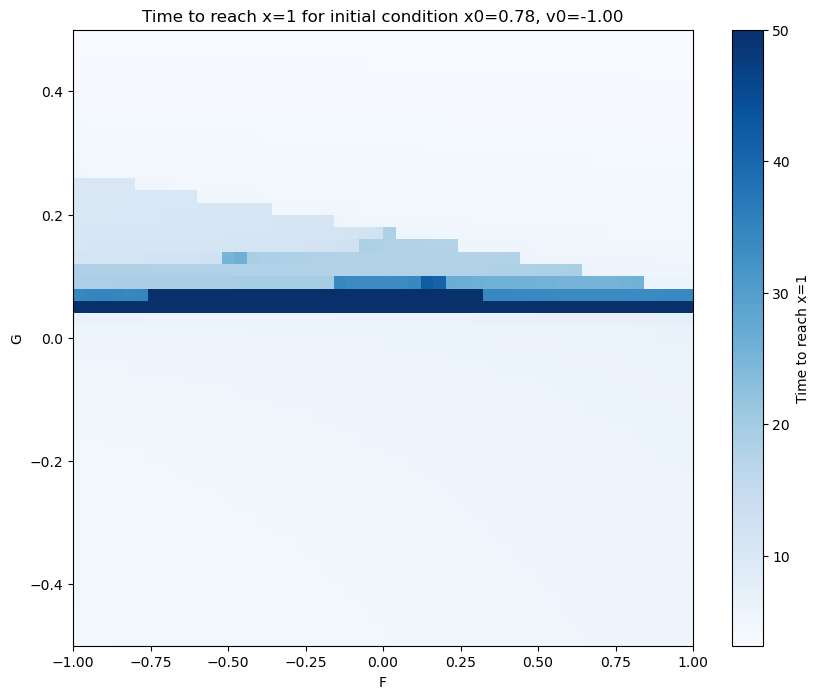

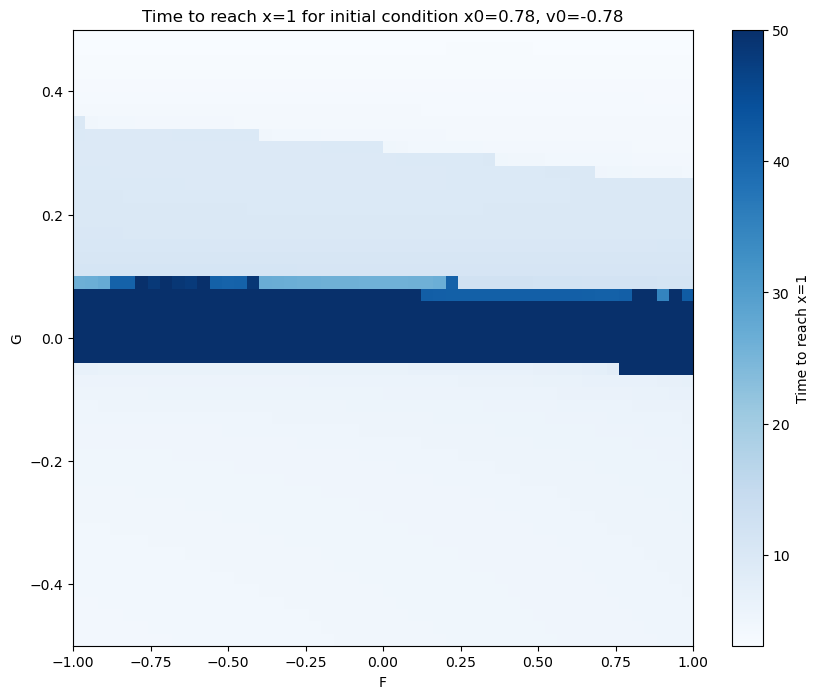

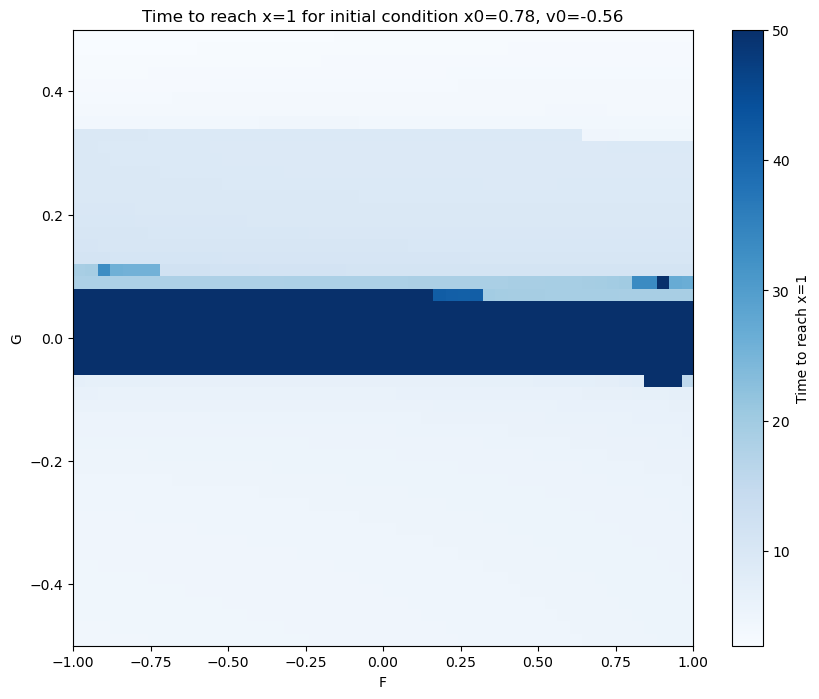

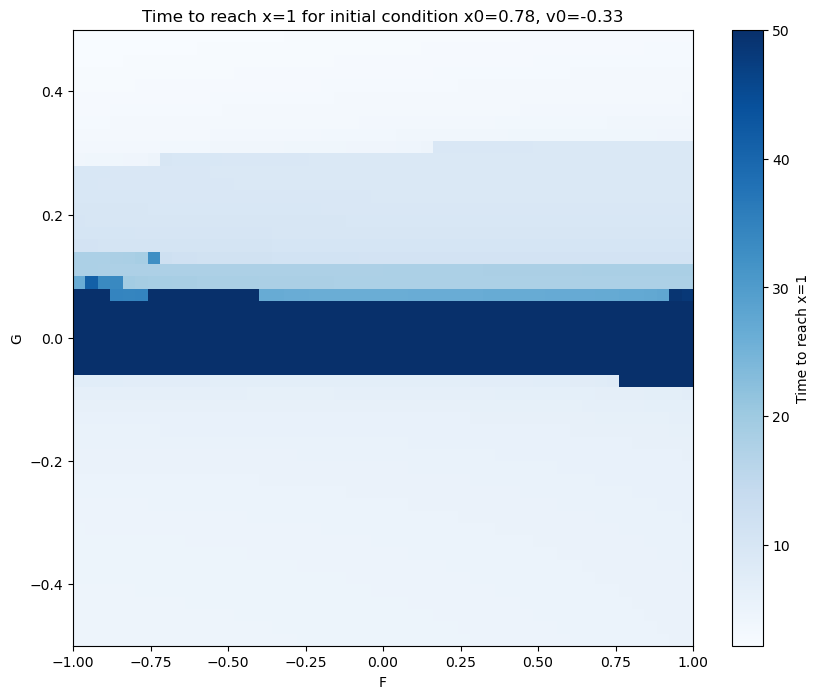

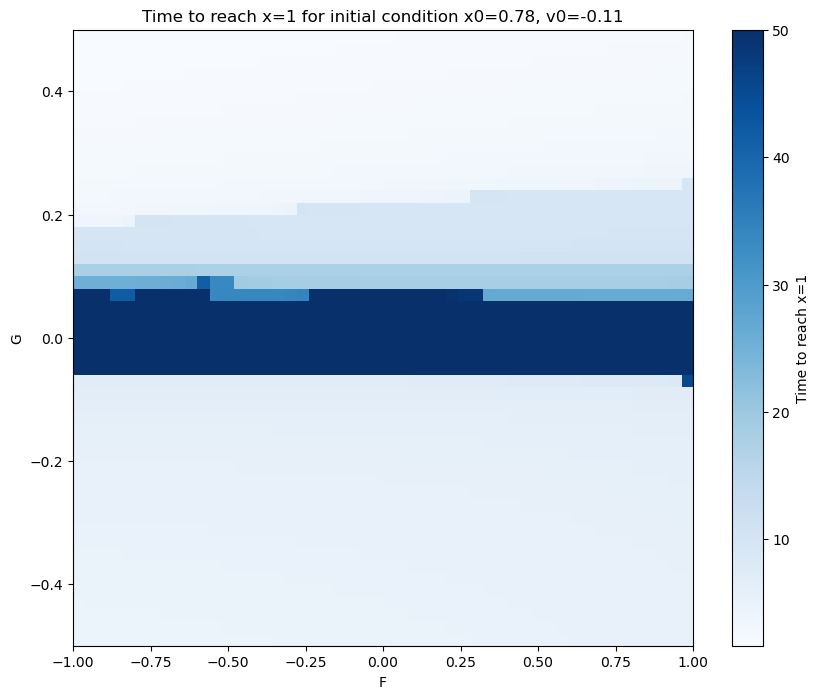

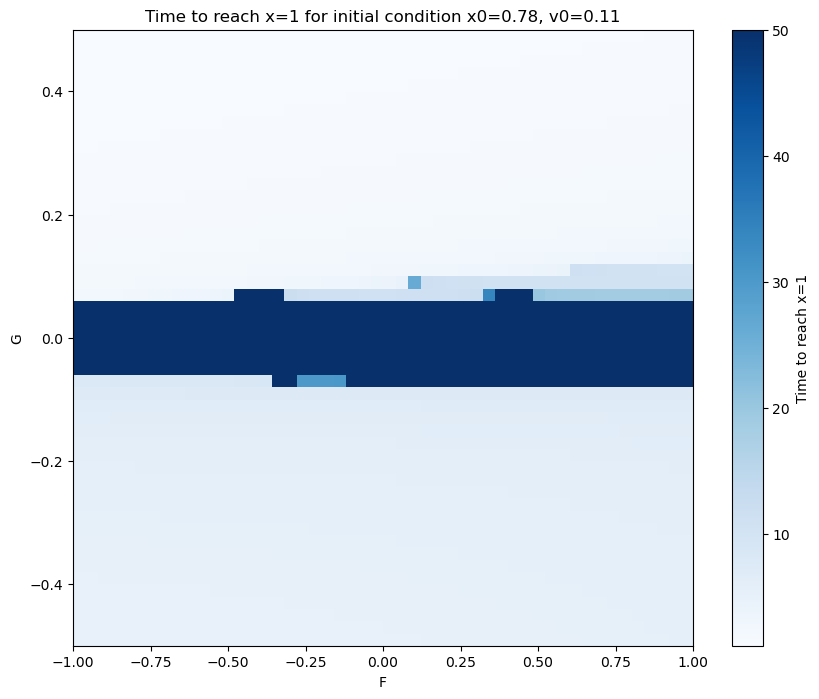

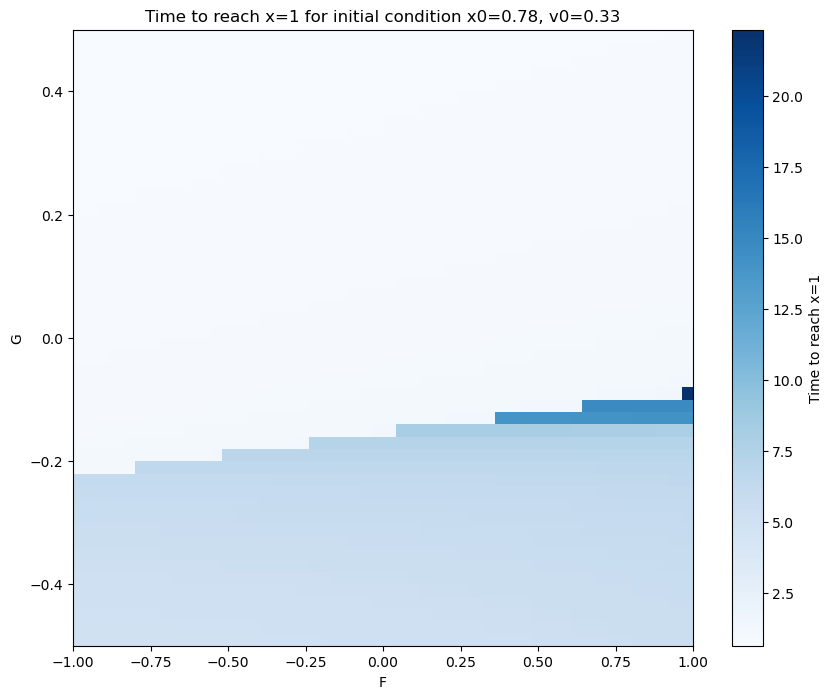

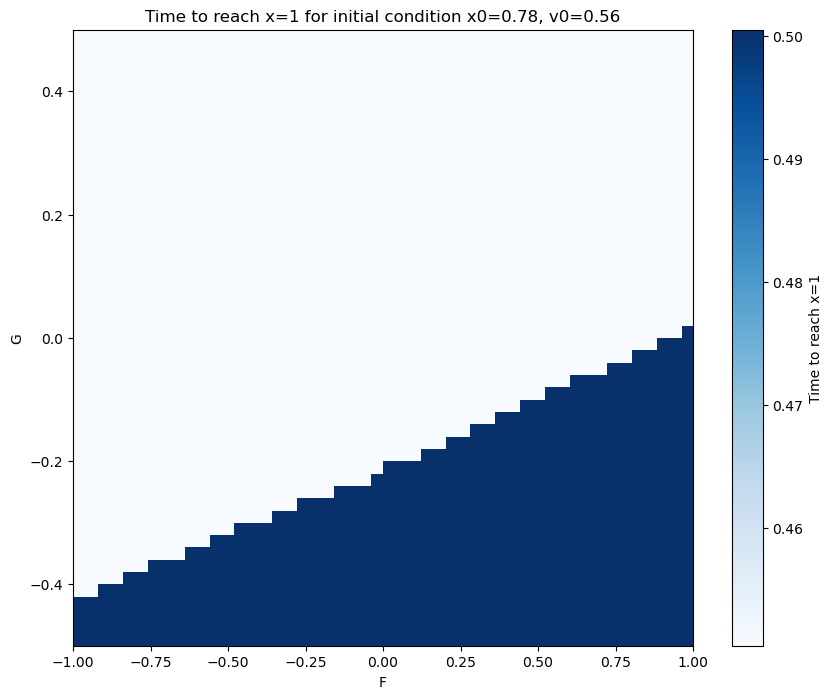

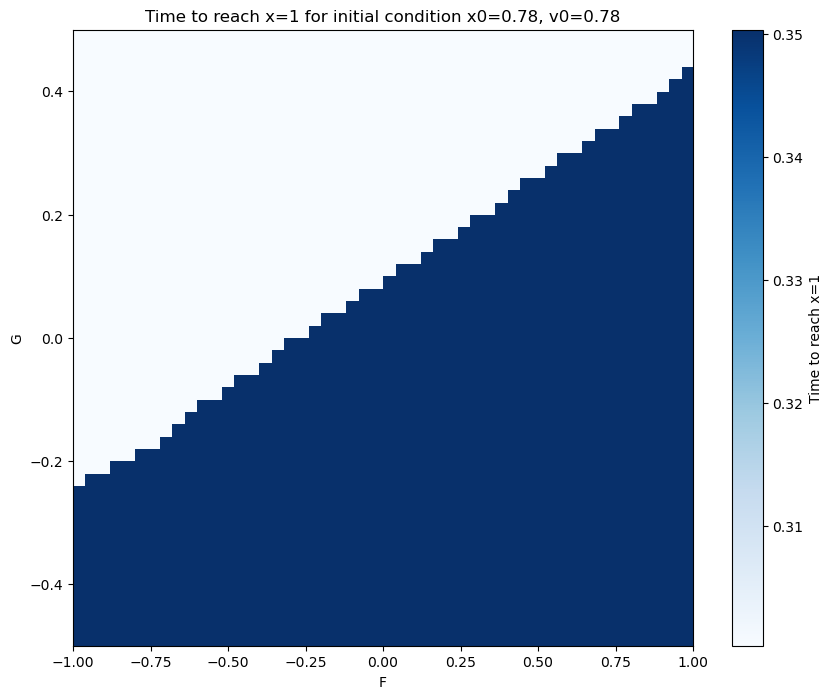

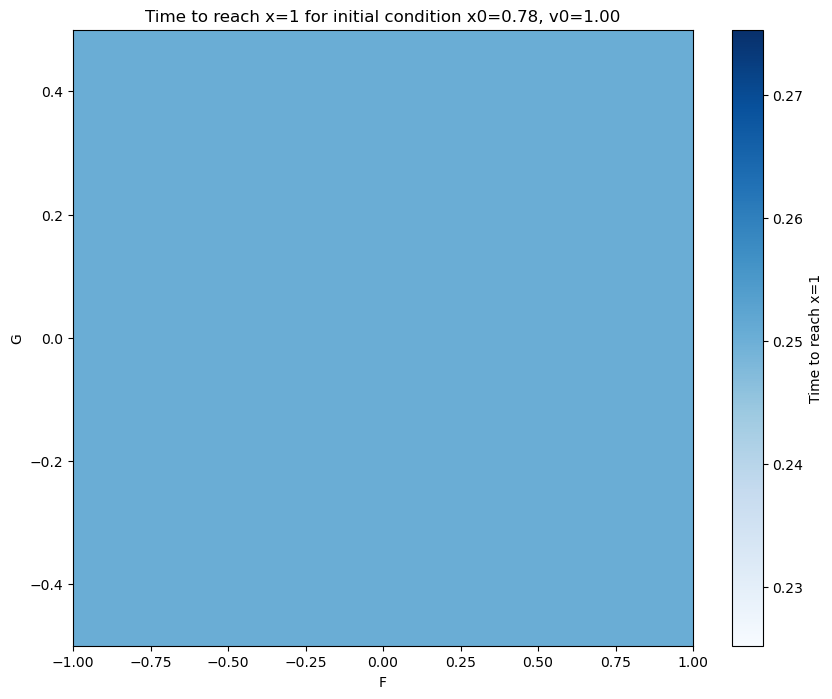

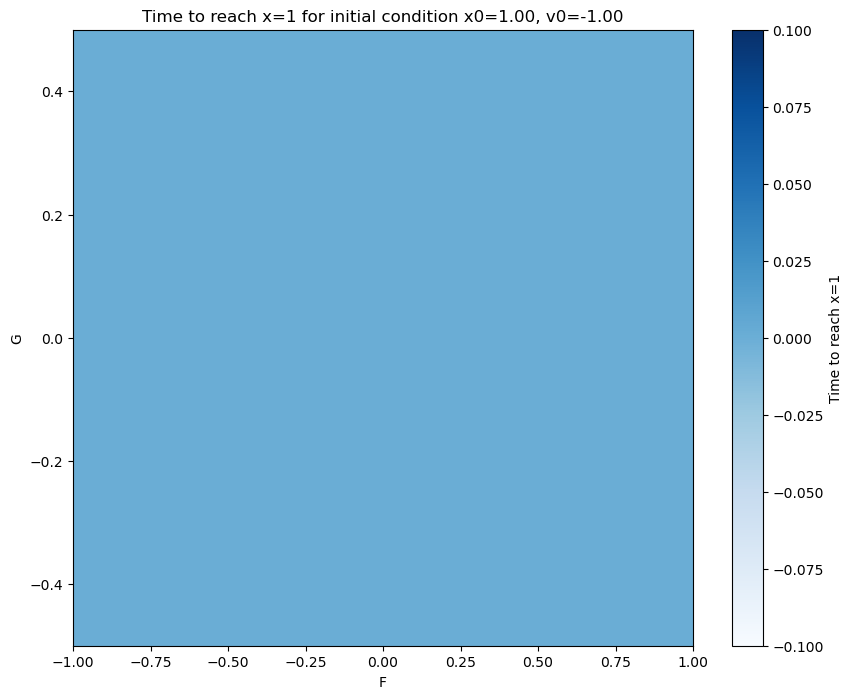

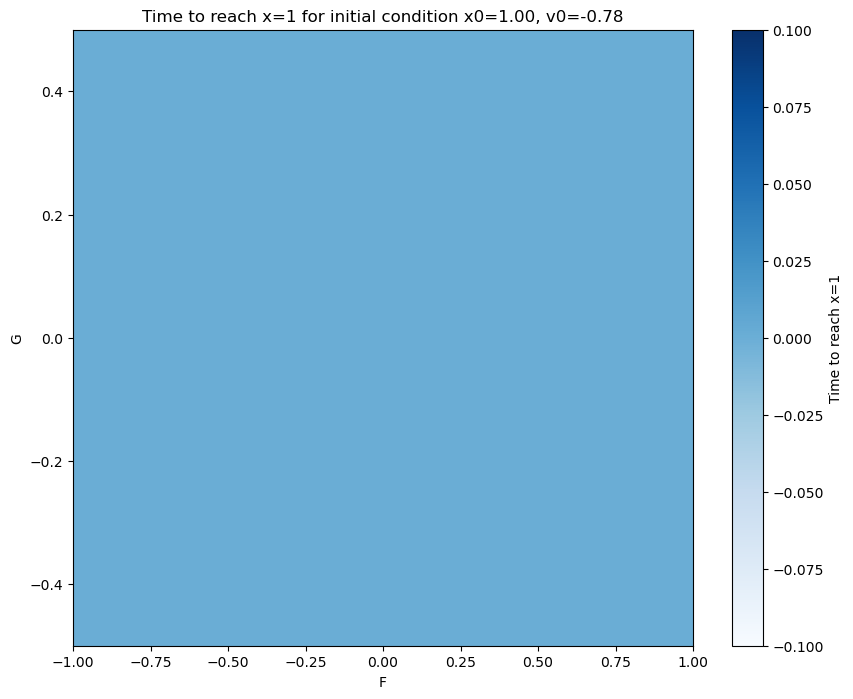

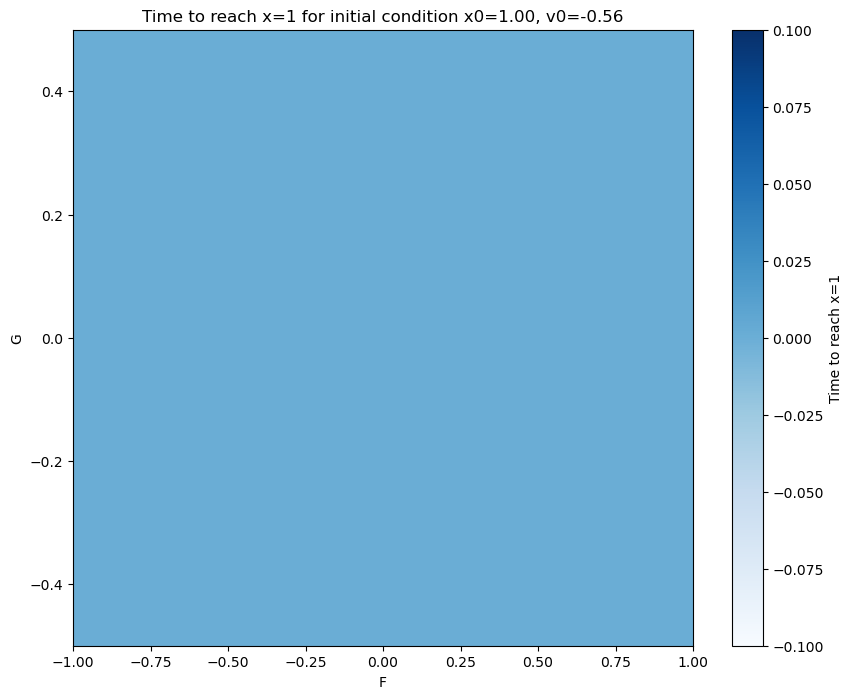

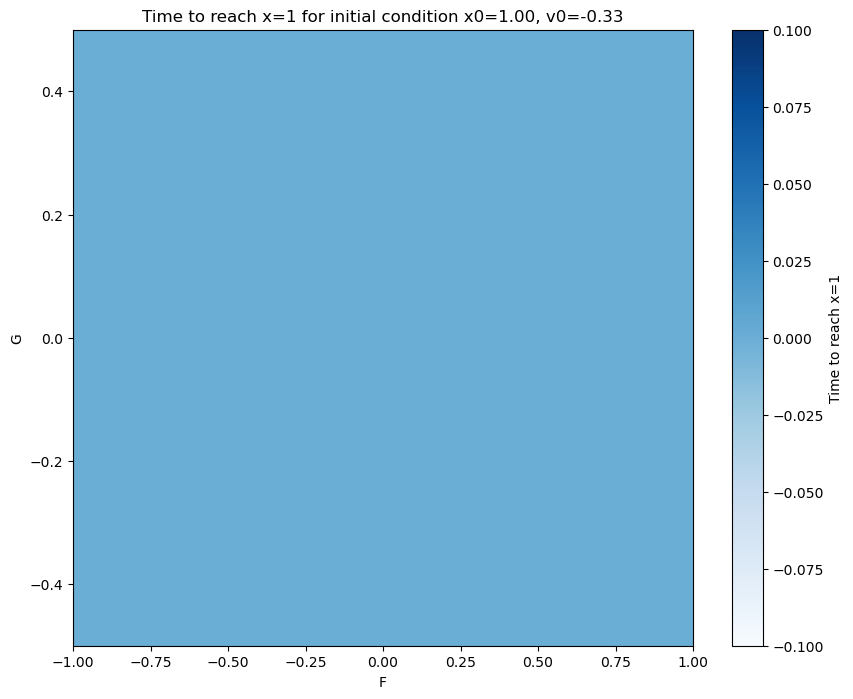

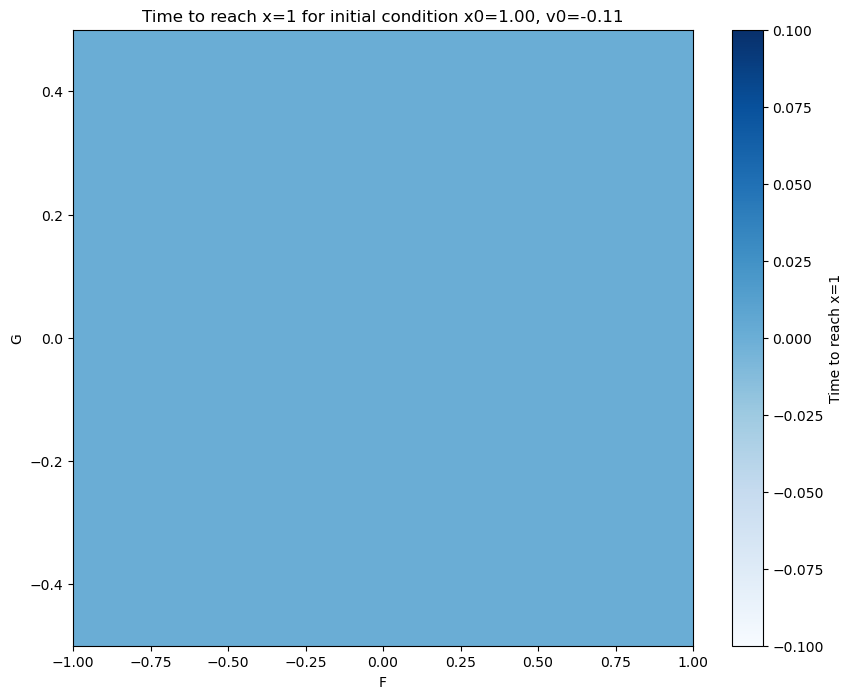

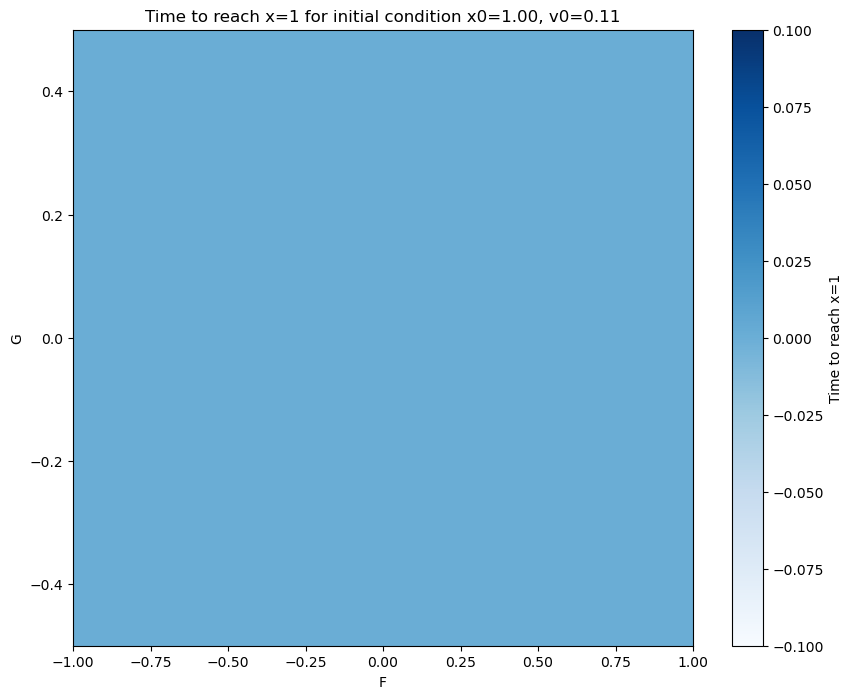

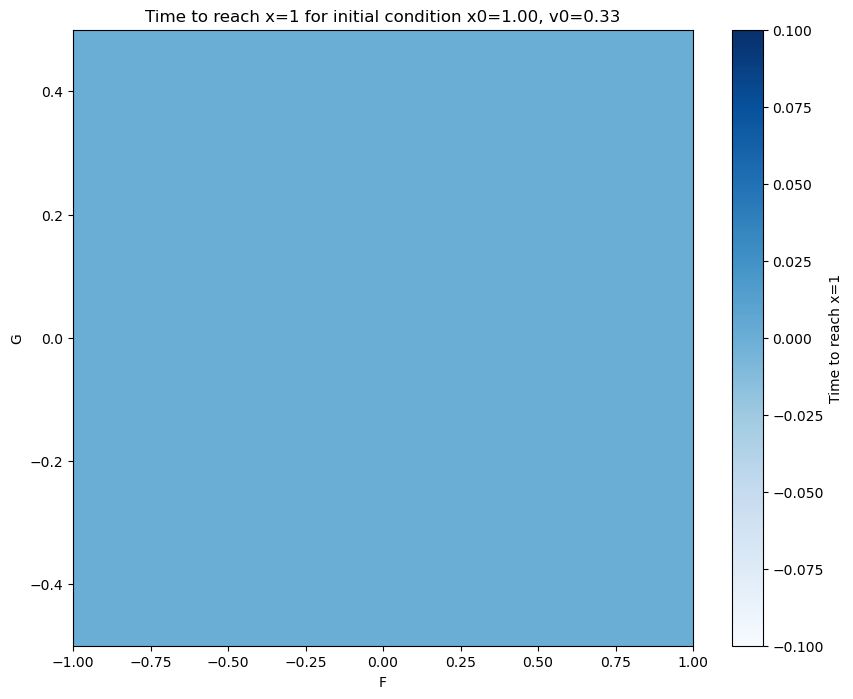

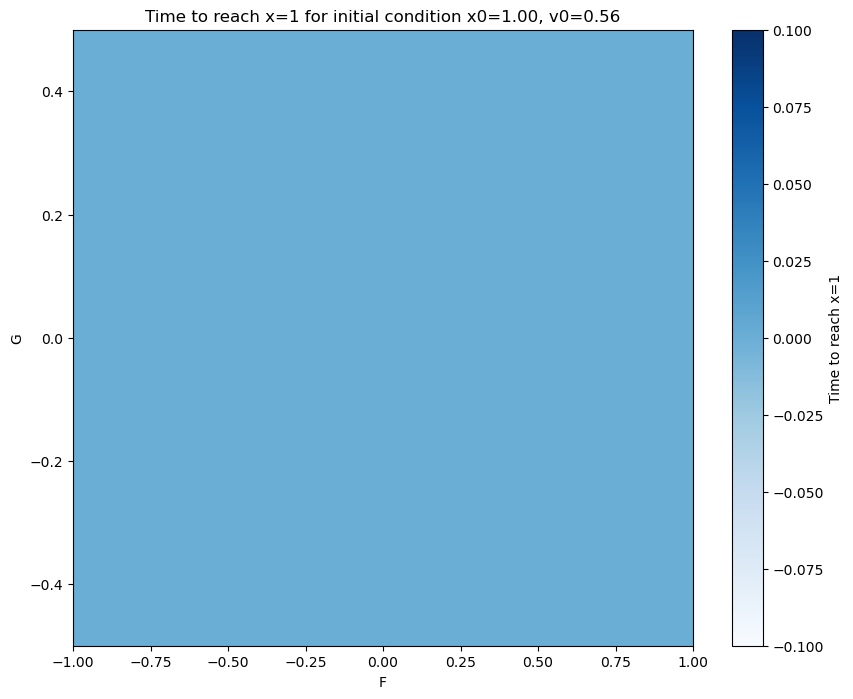

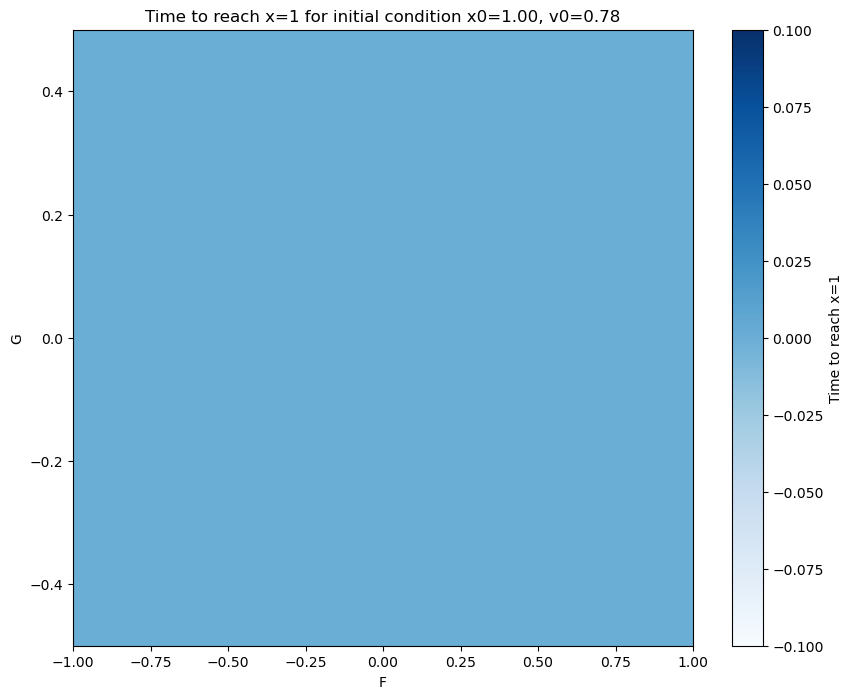

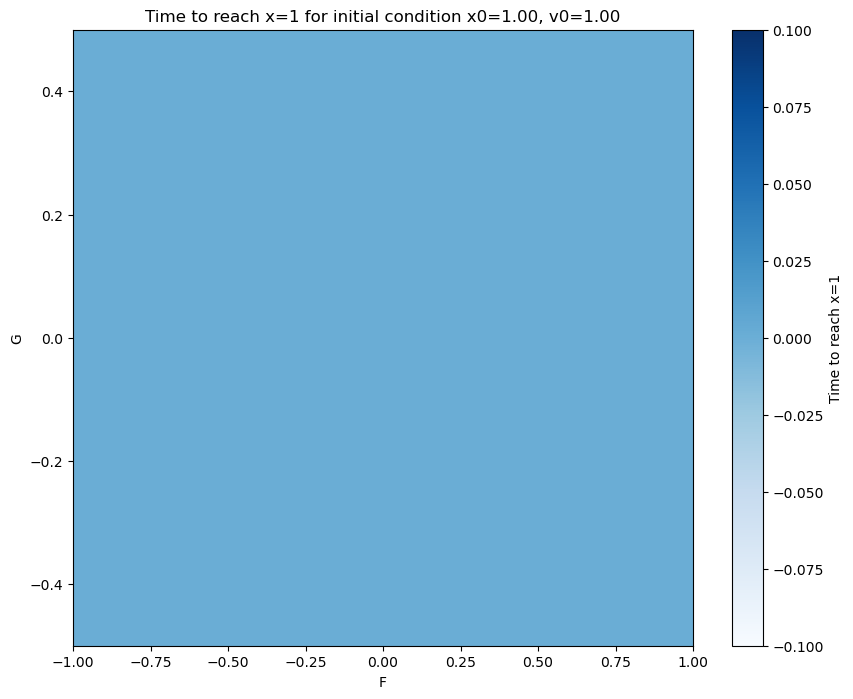

In [4]:
# Colormaps for a set of initial conditions and range of F and G values

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp



# Parameters
beta = 0.2
omega = 0.85  
t_max = 50   
initial_conditions = [0, 0]  

t_values = np.linspace(0, t_max, 1000)
F_values = np.linspace(-1, 1, 50)  
G_values = np.linspace(-0.5, 0.5, 50)
x_init_values = np.linspace(-1, 1, 10)
v_init_values = np.linspace(-1, 1, 10)



def system(t, y, F, G):
    x, v = y
    dxdt = v
    dvdt = -beta*v - x*(1-x)*(1 + G*np.cos(omega*t)) + F*np.sin(omega*t)
    return [dxdt, dvdt]




time_stop = np.zeros((len(F_values), len(G_values), len(x_init_values), len(v_init_values)))

for i, F in enumerate(F_values):
    for j, G in enumerate(G_values):
        for k, x_init in enumerate(x_init_values):
            for l, v_init in enumerate(v_init_values):
                initial_conditions = [x_init, v_init]
                sol = solve_ivp(system, [0, t_max], initial_conditions, t_eval=t_values, method='RK45', args=(F,G))
                
                x_values = sol.y[0]  
                time_stop_val = t_max  
                for m, x in enumerate(x_values):
                    if x >= 1:
                        time_stop_val = sol.t[m] 
                        break
                time_stop[i, j, k, l] = time_stop_val



for k, x_init in enumerate(x_init_values):
    for l, v_init in enumerate(v_init_values):
        time_stop_slice = time_stop[:, :, k, l]
        
        plt.figure(figsize=(10, 8))
        plt.imshow(time_stop_slice, aspect='auto',extent=[F_values[0], F_values[-1], G_values[0], G_values[-1]], origin='lower', cmap='Blues', interpolation='nearest')
        plt.colorbar(label="Time to reach x=1")
        plt.xlabel("F")
        plt.ylabel("G")
        plt.title(f"Time to reach x=1 for initial condition x0={x_init:.2f}, v0={v_init:.2f}")
        plt.savefig(f'plot/({x_init:.2f},{v_init:.2f}).png', dpi=600)
        plt.show()

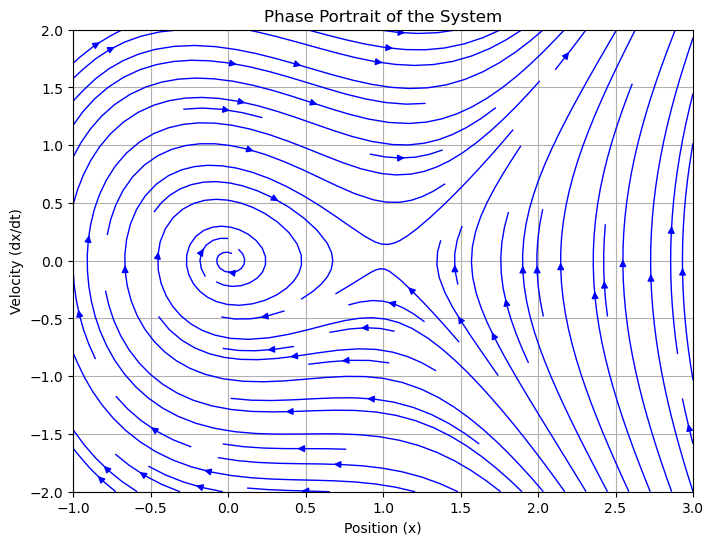

In [5]:
# Phase portrait for some particular time t

import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 0.2    
G = 0.32
omega = 0.85  
F = 0.02

x1_vals = np.linspace(-1, 3, 1000)
x2_vals = np.linspace(-2, 2, 1000)
X1, X2 = np.meshgrid(x1_vals, x2_vals)


def system(t, y, F, G):
    x1, x2 = y  
    dx1dt = x2
    dx2dt = F * np.sin(omega * t) - beta * x2 - x1 * (1 - x1) * (1 + G * np.cos(omega * t))
    return np.array([dx1dt, dx2dt])



U = np.zeros_like(X1)
V = np.zeros_like(X2)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        state = np.array([X1[i, j], X2[i, j]])
        derivatives = system(0, state, F, G)
        U[i, j] = derivatives[0]
        V[i, j] = derivatives[1] 




plt.figure(figsize=(8, 6))
plt.streamplot(X1, X2, U, V, color='b', linewidth=1)
plt.xlabel('Position (x)')
plt.ylabel('Velocity (dx/dt)')
plt.title('Phase Portrait of the System')
plt.savefig('phase_portrait.png', dpi=600)
plt.grid(True)
plt.show()


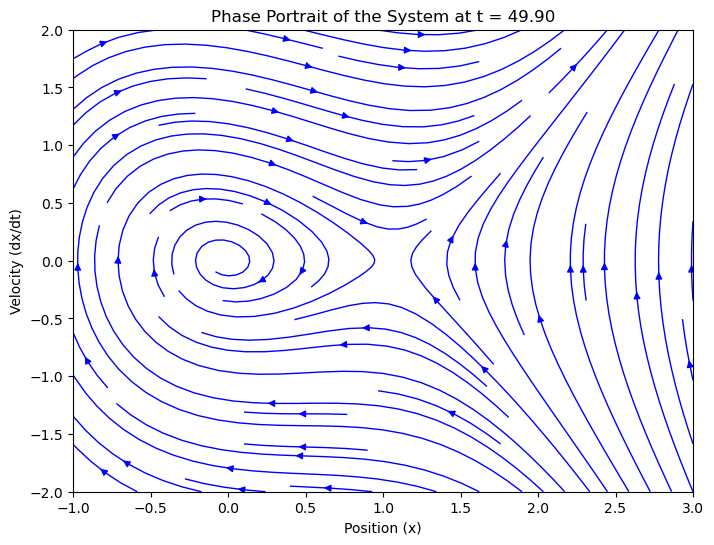

In [6]:
# Animation of phase portrait evolving in time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
beta = 0.2
G = 0.32
omega = 0.85
F = 0.02
t_max = 50
t_steps = 500 

x1_vals = np.linspace(-1, 3, 40)
x2_vals = np.linspace(-2, 2, 20)
X1, X2 = np.meshgrid(x1_vals, x2_vals)



def system(t, y, F, G):
    x1, x2 = y 
    dx1dt = x2
    dx2dt = -beta * x2 - x1 * (1 - x1) * (1 + G * np.cos(omega * t)) + F * np.sin(omega * t)
    return np.array([dx1dt, dx2dt])




fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-1, 3)
ax.set_ylim(-2.5, 2.5)
ax.set_xlabel('Position (x)')
ax.set_ylabel('Velocity (dx/dt)')
ax.set_title('Phase Portrait of the System')


def update(frame):
    ax.clear()
    ax.set_xlim(-1, 3)
    ax.set_ylim(-2, 2)
    ax.set_xlabel('Position (x)')
    ax.set_ylabel('Velocity (dx/dt)')
    ax.set_title(f'Phase Portrait of the System at t = {frame * t_max / t_steps:.2f}')

    U = np.zeros_like(X1)
    V = np.zeros_like(X2)

    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            state = np.array([X1[i, j], X2[i, j]])
            derivatives = system(frame * t_max / t_steps, state, F, G)
            U[i, j] = derivatives[0]
            V[i, j] = derivatives[1]

    strm = ax.streamplot(X1, X2, U, V, color='b', linewidth=1)
    
ani = animation.FuncAnimation(fig, update, frames=t_steps, interval=50)
ani.save('phase_portrait_evolving.mp4', writer='ffmpeg', fps=30)

plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

tick = time.time()

# Parameters
beta = 0.2
omega = 0.85 
t_max = 50   

t_values = np.linspace(0, t_max, 1000)
F_values = np.linspace(-1, 1, 50)
G_values = np.linspace(-0.5, 0.5, 50)
x_init_values = np.linspace(0, 1, 10)
v_init_values = np.linspace(0, 1, 10)

def system(t, y, F, G):
    x, v = y
    dxdt = v
    dvdt = F*np.sin(omega*t) - beta*v - x*(1-x)*(1 + G*np.cos(omega*t))
    return [dxdt, dvdt]

time_stop = np.zeros((len(F_values), len(G_values), len(x_init_values), len(v_init_values)))
sustained_cases = []  

total_iterations = len(F_values) * len(G_values)
progress_count = 0

for i, F in enumerate(F_values):
    for j, G in enumerate(G_values):
        progress_count += 1
        print(f"Progress: {progress_count}/{total_iterations} → F = {F:.2f}, G = {G:.2f}")
        for k, x_init in enumerate(x_init_values):
            for l, v_init in enumerate(v_init_values):
                initial_conditions = [x_init, v_init]
                sol = solve_ivp(system, [0, t_max], initial_conditions, t_eval=t_values, method='RK45', args=(F, G))
                
                x_values = sol.y[0]
                time_stop_val = t_max  

                for m, x in enumerate(x_values):
                    if x > 1:
                        time_stop_val = sol.t[m]
                        break

                time_stop[i, j, k, l] = time_stop_val

                if time_stop_val == t_max:
                    sustained_cases.append({
                        'F': F,
                        'G': G,
                        'x0': x_init,
                        'v0': v_init
                    })

print(f"\nTotal sustained cases: {len(sustained_cases)}")

output_path = "sustained_cases.txt"

with open(output_path, 'w') as f:
    f.write(rf"Total sustained cases: {len(sustained_cases)}\n beta={beta}\t omega={omega}\t t_max={t_max}\n\n")
    for sus in sustained_cases:
        f.write(f"F={sus['F']:.2f}, G={sus['G']:.2f}, x0={sus['x0']:.2f}, v0={sus['v0']:.2f}\n")

print(f"\nSaved sustained cases to {output_path}")

tock = time.time()
print("Total computation time =", tock - tick, "seconds")

Progress: 1/2500 → F = -1.00, G = -0.50
Progress: 2/2500 → F = -1.00, G = -0.48
Progress: 3/2500 → F = -1.00, G = -0.46
Progress: 4/2500 → F = -1.00, G = -0.44
Progress: 5/2500 → F = -1.00, G = -0.42
Progress: 6/2500 → F = -1.00, G = -0.40
Progress: 7/2500 → F = -1.00, G = -0.38
Progress: 8/2500 → F = -1.00, G = -0.36
Progress: 9/2500 → F = -1.00, G = -0.34
Progress: 10/2500 → F = -1.00, G = -0.32
Progress: 11/2500 → F = -1.00, G = -0.30
Progress: 12/2500 → F = -1.00, G = -0.28
Progress: 13/2500 → F = -1.00, G = -0.26
Progress: 14/2500 → F = -1.00, G = -0.23
Progress: 15/2500 → F = -1.00, G = -0.21
Progress: 16/2500 → F = -1.00, G = -0.19
Progress: 17/2500 → F = -1.00, G = -0.17
Progress: 18/2500 → F = -1.00, G = -0.15
Progress: 19/2500 → F = -1.00, G = -0.13
Progress: 20/2500 → F = -1.00, G = -0.11
Progress: 21/2500 → F = -1.00, G = -0.09
Progress: 22/2500 → F = -1.00, G = -0.07
Progress: 23/2500 → F = -1.00, G = -0.05
Progress: 24/2500 → F = -1.00, G = -0.03
Progress: 25/2500 → F = -